In [1]:
import os, sys, glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import contextily as cx
import pickle

import IR_processing_utils
import IR_corrections

from tqdm import tqdm

import scipy.signal

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 7


In [2]:
#data_dir = r"M:\202404 Pleistocene Park\IR_mavic3\DJI_202404211121_009_Pleystocen-IRb"; flight_height = 160

#data_dir = r'G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404210937_006_Pleystocen-IR'; flight_height = 160
#data_dir = r"G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404211121_009_Pleystocen-IRb"; flight_height = 160

#data_dir = r"G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404221041_013_Pleystocen-IR4"; flight_height = 400

#data_dir = r'G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404221002_011_Pleystocen-IR3'; flight_height = 220
#data_dir = r'G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404221218_016_Pleystocen-IR3b'; flight_height = 220
#data_dir = r'G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404230843_017_Pleystocen-IR5'; flight_height = 230

#data_dir = r'G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404231239_024_Pleystocen-IR3'; flight_height = 220

#data_dir = r"G:\! Data\IFA\! campaigns\292406 Mukhrino\IR processing\2024.6.4\16_16\DJI_202406041912_048_muhrino-big-2"; flight_height = 150
#data_dir = r"G:\! Data\IFA\! campaigns\292406 Mukhrino\IR processing\2024.6.4\16_16\DJI_202406041941_049_muhrino-big-2"; flight_height = 150

#data_dir = r"G:\! Data\IFA\! campaigns\292406 Mukhrino\IR processing\2024.6.4\12_00\DJI_202406041528_045_muhrino-big-2"; flight_height = 150
#data_dir = r"G:\! Data\IFA\! campaigns\292406 Mukhrino\IR processing\2024.6.4\12_00\DJI_202406041458_044_muhrino-big-2"; flight_height = 150

#data_dir = r"M:\202408 Pleistocene Park\IR_Mavic3\11_02_evening"; flight_height = 220
#data_dir = r"G:\! Data\IFA\! campaigns\202408 Pleistocene Park\IR_Mavic3\1208_day_IR3"; flight_height = 220
#data_dir = r"G:\! Data\IFA\! campaigns\202408 Pleistocene Park\IR_Mavic3\1208_day_IR3b"; flight_height = 220
#data_dir = r"G:\! Data\IFA\! campaigns\202408 Pleistocene Park\IR_Mavic3\1208_evening_IR3"; flight_height = 220
data_dir = r"G:\! Data\IFA\! campaigns\202408 Pleistocene Park\IR_Mavic3\1208_evening_IR3b"; flight_height = 220


data_subdir = 'tiffs_thermal_parser, emis = 1.00'
#data_subdir = None

sensor_size = [6.144, 7.68] #Mavic sensor size in mm

corr_opts = {'detrend': True, 
             'use_L0': True,
             'L0_rad': 50,
             'L2_wnd': 9, 'L2_nsteps': 3,
             'L3_wnd': 9, 'L3_nsteps': 5}

#***************************************************************************************************

opts_str = 'detrend=%d, use_L0=%d'%(corr_opts['detrend'],corr_opts['use_L0'])

dji_subdirs = glob.glob (data_dir + '\\DJI*')
if len (dji_subdirs) == 0:
    dji_subdirs = [data_dir]


img_array = {}
for i, dji_subdir in enumerate (dji_subdirs):
    display(dji_subdir)
    if data_subdir is not None:
        data_dir_src = dji_subdir + '/' + data_subdir + '/'
    else:
        data_dir_src = dji_subdir + '/'

    cur_array, cur_df = IR_processing_utils.read_IR_images (data_dir_src, n_jobs = 1)
    #cur_df['folder'] = data_dir_src
    if i == 0:
        img_array['t_raw'] = cur_array
        img_df = cur_df
    else:
        img_array['t_raw'] = np.concatenate((img_array['t_raw'], cur_array), axis=2)
        img_df = pd.concat((img_df, cur_df), ignore_index = True)
    

img_shape = img_array['t_raw'].shape
img_N = img_df.shape[0]

img_df = IR_processing_utils.calc_azimuth4df (img_df)
img_df = IR_processing_utils.init_polygons4df (img_df, sensor_size, flight_height)

display(img_df.head())

pics_dir = data_dir + '/processing_pics' + (('_' + data_subdir) if data_subdir is not None else '') + '/'
if not os.path.isdir (pics_dir):
    os.mkdir (pics_dir)

save_dir = pics_dir + '/corr_with_L0/'
if not os.path.isdir (save_dir):
    os.mkdir (save_dir)







'G:\\! Data\\IFA\\! campaigns\\202408 Pleistocene Park\\IR_Mavic3\\1208_evening_IR3b\\DJI_202408121549_203_Pleystocen-IR3b'

file    gps_lat     gps_lon  Image ImageWidth  \
0  DJI_20240812155253_0001_T.tiff  68.510332  161.513172             640.0   
1  DJI_20240812155254_0002_T.tiff  68.510371  161.513182             640.0   
2  DJI_20240812155256_0003_T.tiff  68.510502  161.513228             640.0   
3  DJI_20240812155258_0004_T.tiff  68.510696  161.513296             640.0   
4  DJI_20240812155300_0005_T.tiff  68.510930  161.513376             640.0   

   Image ImageLength  Image BitsPerSample  Image Compression  \
0              512.0                 32.0                1.0   
1              512.0                 32.0                1.0   
2              512.0                 32.0                1.0   
3              512.0                 32.0                1.0   
4              512.0                 32.0                1.0   

   Image PhotometricInterpretation Image ImageDescription Image Make  ...  \
0                              1.0               WhiteHot        DJI  ...   
1                              1.0               WhiteHot        DJI  ...   
2                              1.0               WhiteHot        DJI  ...   
3                              1.0               WhiteHot        DJI  ...   
4                              1.0               WhiteHot        DJI  ...   

  EXIF LensSpecification                                             folder  \
0                    9.1  G:\! Data\IFA\! campaigns\202408 Pleistocene P...   
1                    9.1  G:\! Data\IFA\! campaigns\202408 Pleistocene P...   
2                    9.1  G:\! Data\IFA\! campaigns\202408 Pleistocene P...   
3                    9.1  G:\! Data\IFA\! campaigns\202408 Pleistocene P...   
4                    9.1  G:\! Data\IFA\! campaigns\202408 Pleistocene P...   

   gps_azimuth     min_lon     max_lon    min_lat    max_lat  delta_lon  \
0     5.196105  161.510902  161.515442  68.509666  68.510998    0.00454   
1     7.354957  161.510912  161.515452  68.509705  68.511037    0.00454   
2     7.316097  161.510958  161.515498  68.509836  68.511168    0.00454   
3     7.094691  161.511026  161.515566  68.510030  68.511361    0.00454   
4     7.079095  161.511106  161.515646  68.510264  68.511596    0.00454   

   delta_lat                                            Polygon  
0   0.001332  POLYGON ((161.51544208372968 68.51099750648405...  
1   0.001332  POLYGON ((161.5154518931972 68.51103700648665,...  
2   0.001332  POLYGON ((161.51549804512774 68.5111679509084,...  
3   0.001332  POLYGON ((161.51556584249772 68.51136133981943...  
4   0.001332  POLYGON ((161.5156456438495 68.51159614531268,...  

[5 rows x 68 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


identify_swaths4df(): segment 0 reached 29 with az 5, mean_az6

identify_swaths4df(): segment 1 reached -35 with az 195, mean_az-172

identify_swaths4df(): segment 2 reached 27 with az 5, mean_az6

identify_swaths4df(): segment 3 reached -35 with az 188, mean_az-172

identify_swaths4df(): segment 4 reached 27 with az 6, mean_az7

identify_swaths4df(): segment 5 reached -35 with az 186, mean_az-172

identify_swaths4df(): segment 6 reached 27 with az 4, mean_az6

identify_swaths4df(): segment 7 reached -36 with az 189, mean_az-172

identify_swaths4df(): segment 8 reached 27 with az 6, mean_az6

identify_swaths4df(): segment 9 reached -36 with az 186, mean_az-172

identify_swaths4df(): segment 10 reached 28 with az 348, mean_az5

identify_swaths4df(): segment 11 reached -36 with az 185, mean_az-173

identify_swaths4df(): segment 12 reached 28 with az 349, mean_az5

identify_swaths4df(): segment 13 reached -36 with az 185, mean_az-173

identify_swaths4df(): segment 14 reached 28 with az 35

SystemExit: 

c:\Anaconda\envs\GIS\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


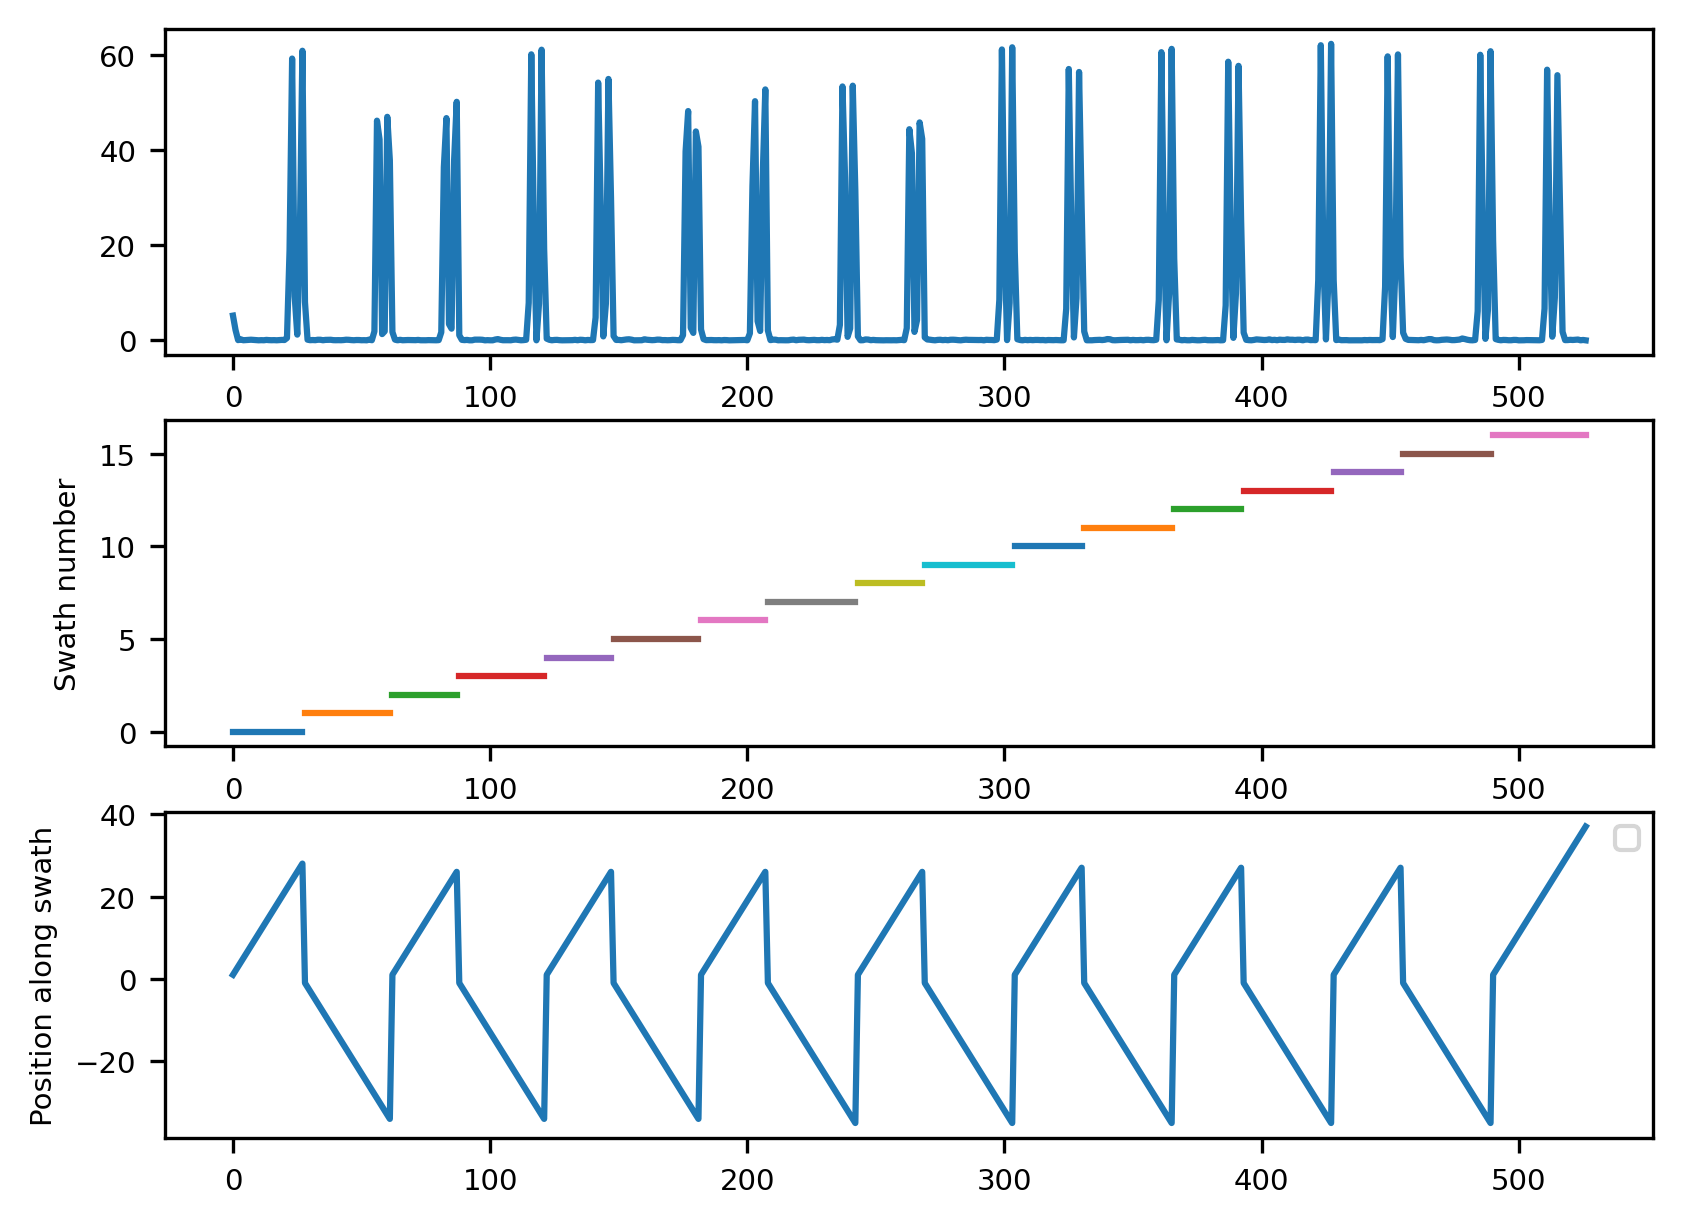

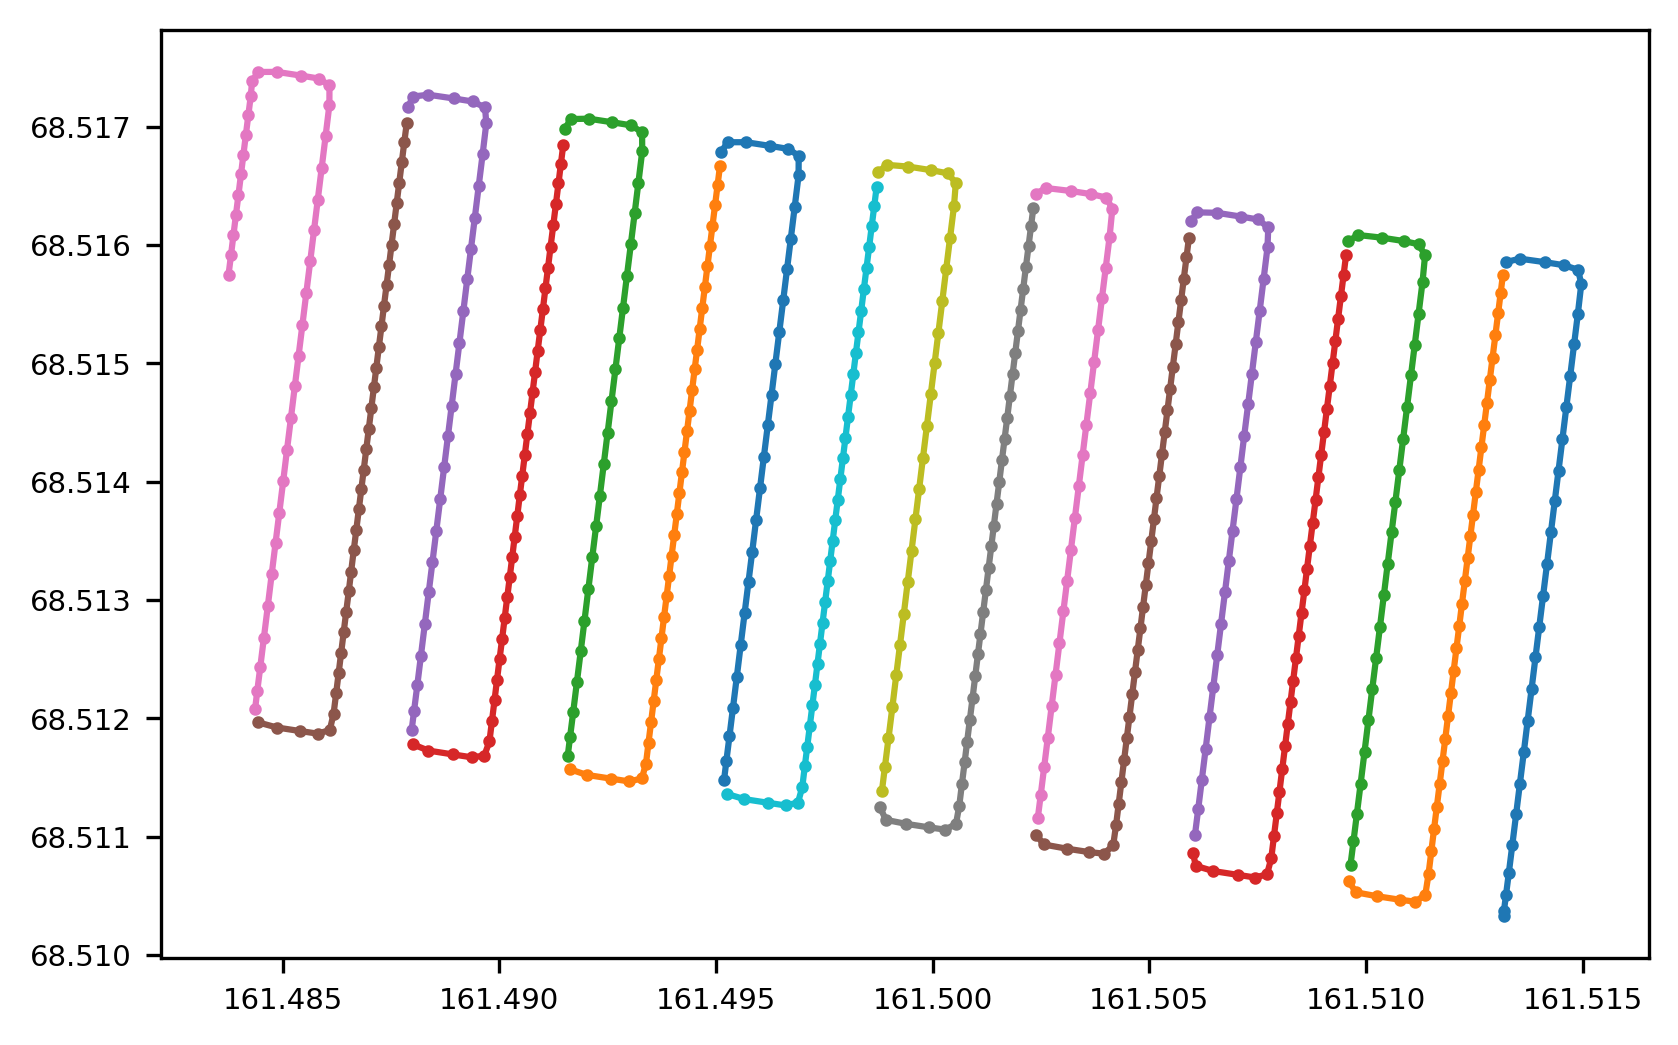

In [3]:
img_df = IR_processing_utils.identify_swaths4df(img_df, min_segment_len = 3, crit_delta_az=160)
    
f, ax = plt.subplots (3,1)
x = img_df.index.to_numpy()

#ax[0].plot (x, img_df['gps_azimuth'], label = 'azimuth')
ax[0].plot (x, img_df['delta_az'], label = 'change of azimuth')
plt.legend()

unique_ids = np.unique(img_df['swath_id'])
for id in unique_ids:
    ax[1].plot (x[img_df['swath_id'] == id], img_df['swath_id'][img_df['swath_id'] == id])
ax[1].set_ylabel ('Swath number')

ax[2].plot (x, img_df['swath_pos'])
ax[2].set_ylabel ('Position along swath')

plt.figure()
for id in unique_ids:
    idx = np.where(img_df['swath_id'] == id)[0]
    plt.plot (img_df['gps_lon'][idx], img_df['gps_lat'][idx], '-o', markersize=2)

#cx.add_basemap(plt.gca(), source = cx.providers.Esri.WorldImagery, crs = 4326, attribution_size = 2)    
plt.gca().set_aspect(1.0/np.cos(img_df['gps_lat'].mean()*np.pi/180))

sys.exit()

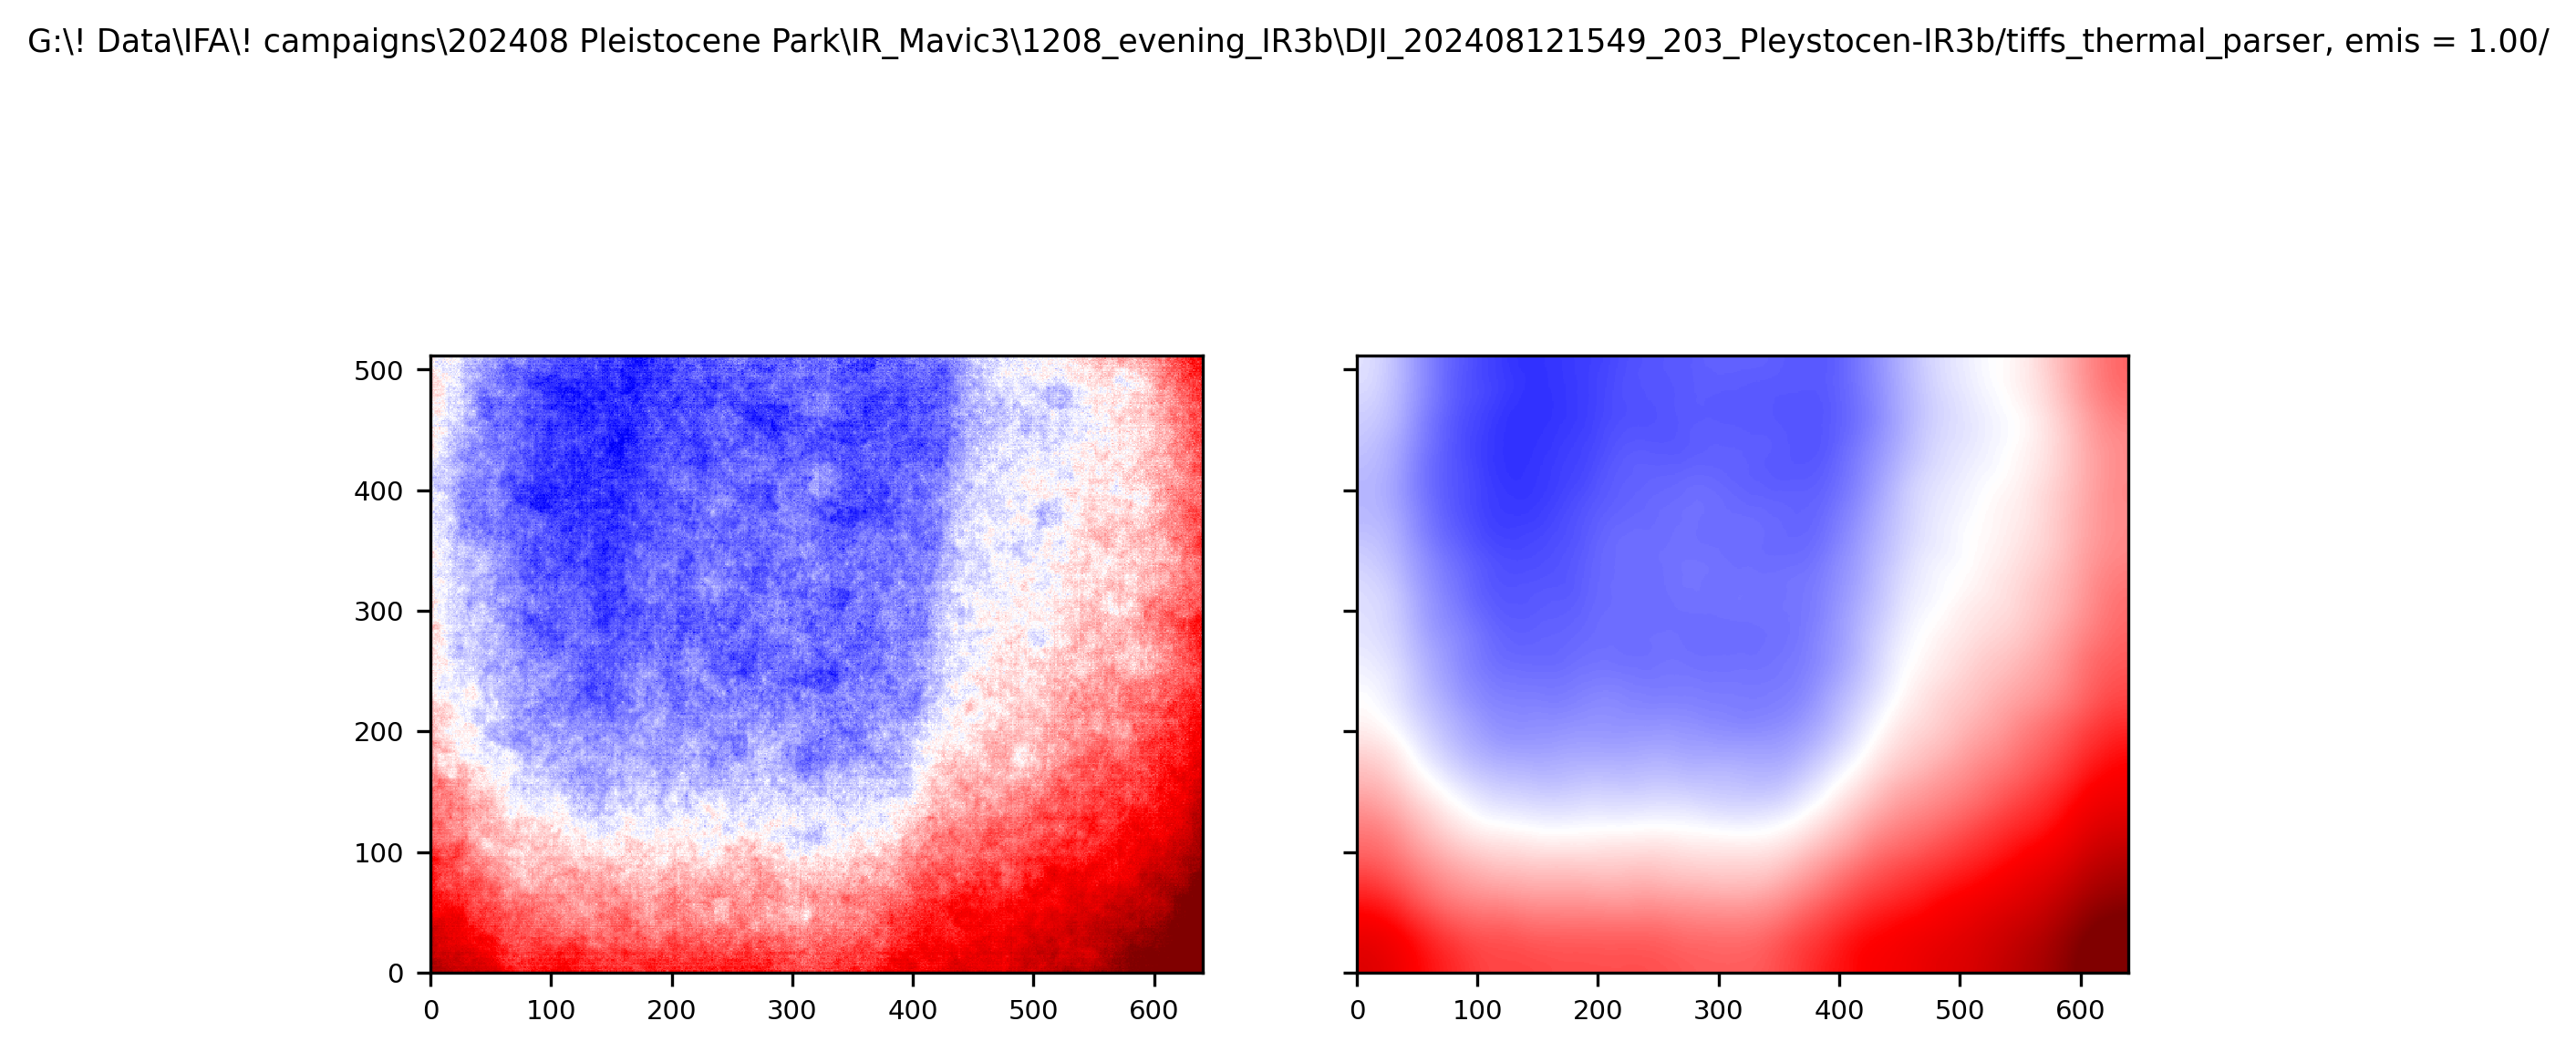

In [ ]:
img_array['t0']  = IR_corrections.run_L0_corr (img_array['t_raw'], img_df, corr_opts['L0_rad'], save_dir)

In [ ]:
if corr_opts['use_L0']:
    t0_source = 't0'
else:
    t0_source = 't_raw'

diff_matrix = {}

reload_pkl = False
pkl_path = data_dir_src + '\\diff_matrix_%s, h = %d'%(t0_source, flight_height) + '.pkl'

if not os.path.isfile (pkl_path):
    reload_pkl = True
if reload_pkl:
    diff_matrix['t0'], diff_weights = IR_processing_utils.calc_diff_matrix (img_array[t0_source], img_df)

    with open(pkl_path, 'wb') as handle:
        pickle.dump((diff_matrix[t0_source], diff_weights), handle, protocol=pickle.HIGHEST_PROTOCOL) 
else:
    with open(pkl_path, 'rb') as handle:
        diff_matrix[t0_source], diff_weights = pickle.load(handle)




'n_outliers = 1, max_diff = 1.301918'

'n_outliers = 2, max_diff = 0.332375'

'n_outliers = 1, max_diff = 0.298538'

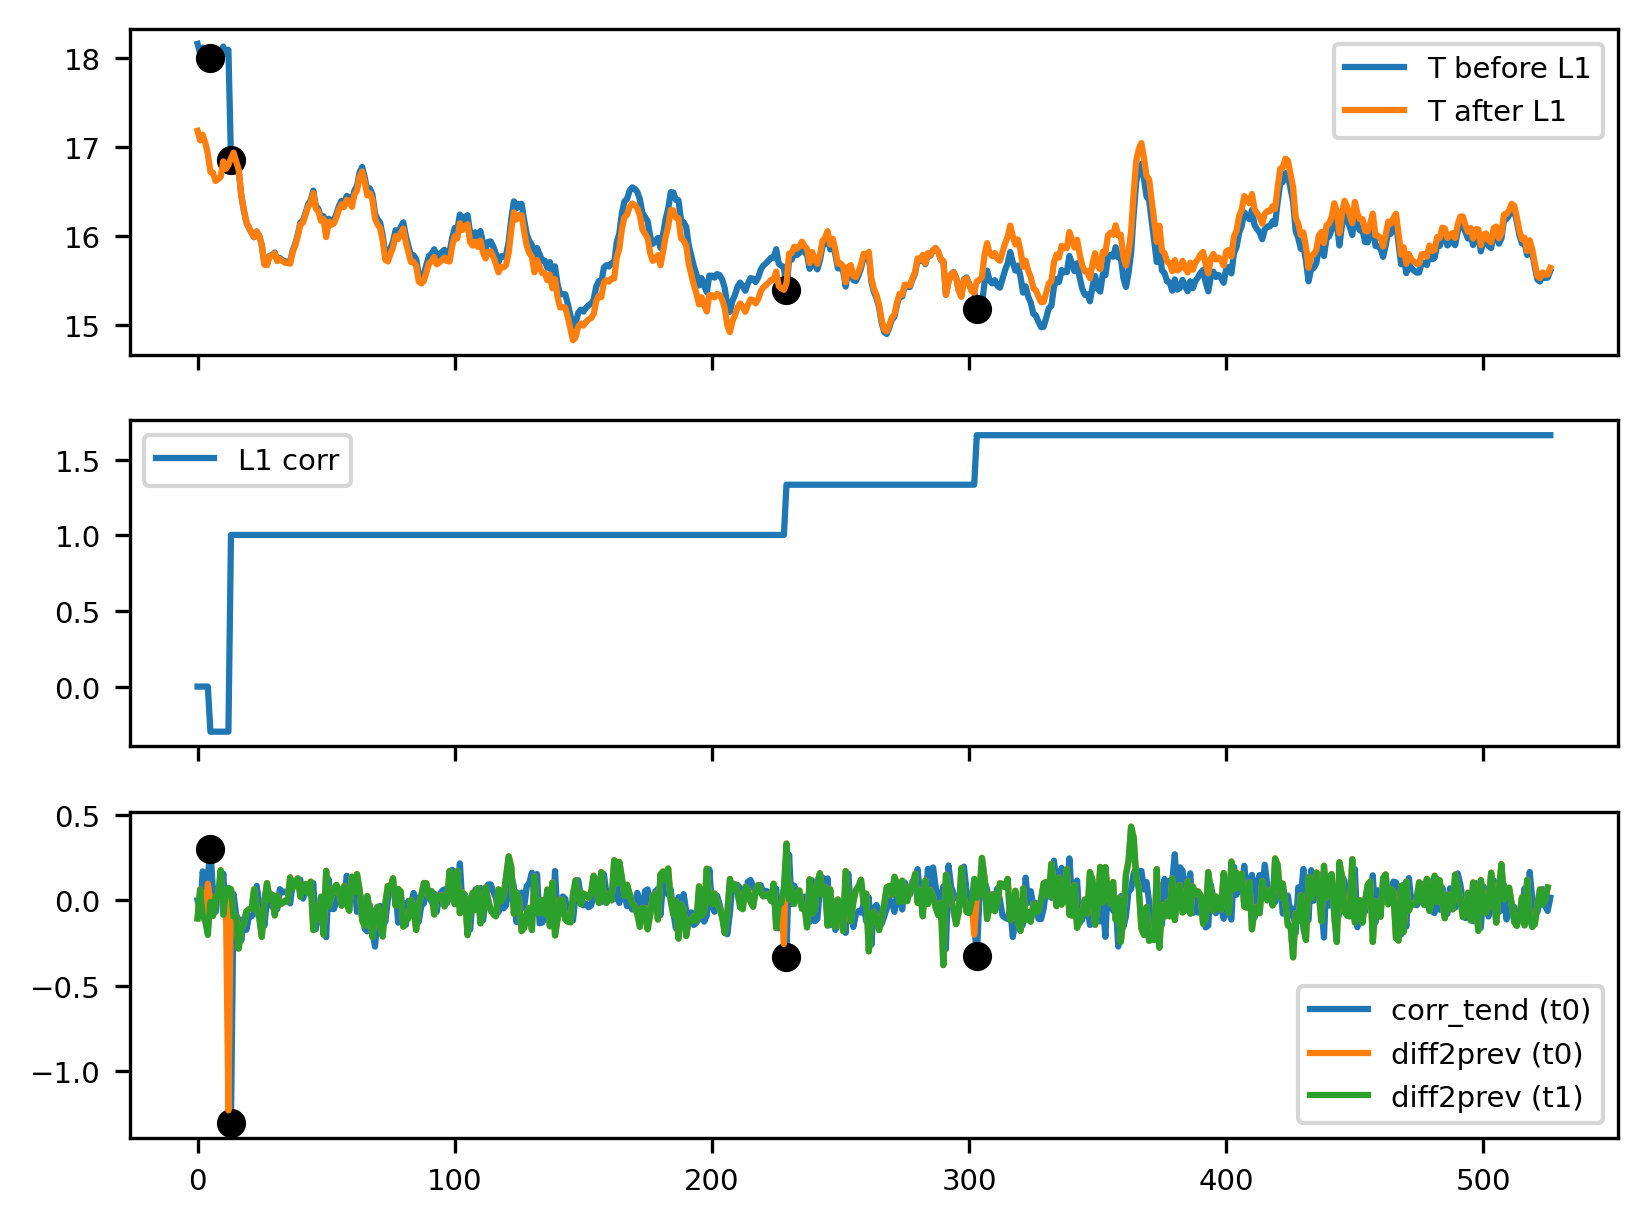

In [ ]:


img_array['t1'], diff_matrix['t1'] = IR_corrections.run_L1_corr (img_array[t0_source], diff_matrix[t0_source],
                                                                 corr_opts['detrend'], pics_dir = save_dir, fig_name = 'L1_corr', opts_str = opts_str)


In [ ]:
#import scipy.signal
# corr_tend1  = np.array([diff_matrix['t1'][i, i-1] if i > 0 else 0 for i in range (0, img_N)])
# corr_tend31 = np.array([diff_matrix['t31'][i, i-1] if i > 0 else 0 for i in range (0, img_N)])

# f, ax = plt.subplots(3,1)
# ax[0].plot(np.cos((np.pi/180)*img_df['gps_azimuth']))
# ax[1].plot(corr_tend1)
# ax[1].plot(corr_tend1)

#ax[1].plot(corr_tend31)


# plt.plot()

# ax[2].plot(np.cumsum(corr_tend1))# -np.mean(corr_tend1))) #-np.mean(corr_tend)))
# ax[2].plot(np.cumsum(corr_tend31))# -np.mean(corr_tend31)))
# # ax[2].plot(scipy.signal.detrend (np.cumsum(corr_tend)))

# idx = np.argmax(np.abs(corr_tend))
#display(corr_tend[idx])

# delta01 = IR_processing_utils.compare_polygons (img_array['t1'], img_df, idx+2, idx+1, draw_figure = False)[0]
# delta03 = IR_processing_utils.compare_polygons (img_array['t1'], img_df, idx+2, idx-1, draw_figure = True)[0]


# delta12 = IR_processing_utils.compare_polygons (img_array['t1'], img_df, idx+1, idx, draw_figure = False)[0]
# delta13 = IR_processing_utils.compare_polygons (img_array['t1'], img_df, idx, idx-1, draw_figure = False)[0]
# delta23 = IR_processing_utils.compare_polygons (img_array['t1'], img_df, idx+1, idx-1, draw_figure = False)[0]
#delta13 = IR_processing_utils.compare_polygons (img_array['t2'], img_df, idx, idx-2, draw_figure = False)[0]
#delta23 = IR_processing_utils.compare_polygons (img_array['t2'], img_df, idx-1, idx-2, draw_figure = False)[0]

# display(delta01)
# display(delta12)
# display(delta23)

# display(delta13)
# display(delta03)

#display(delta13)
#display(delta23)



KeyError: 't31'

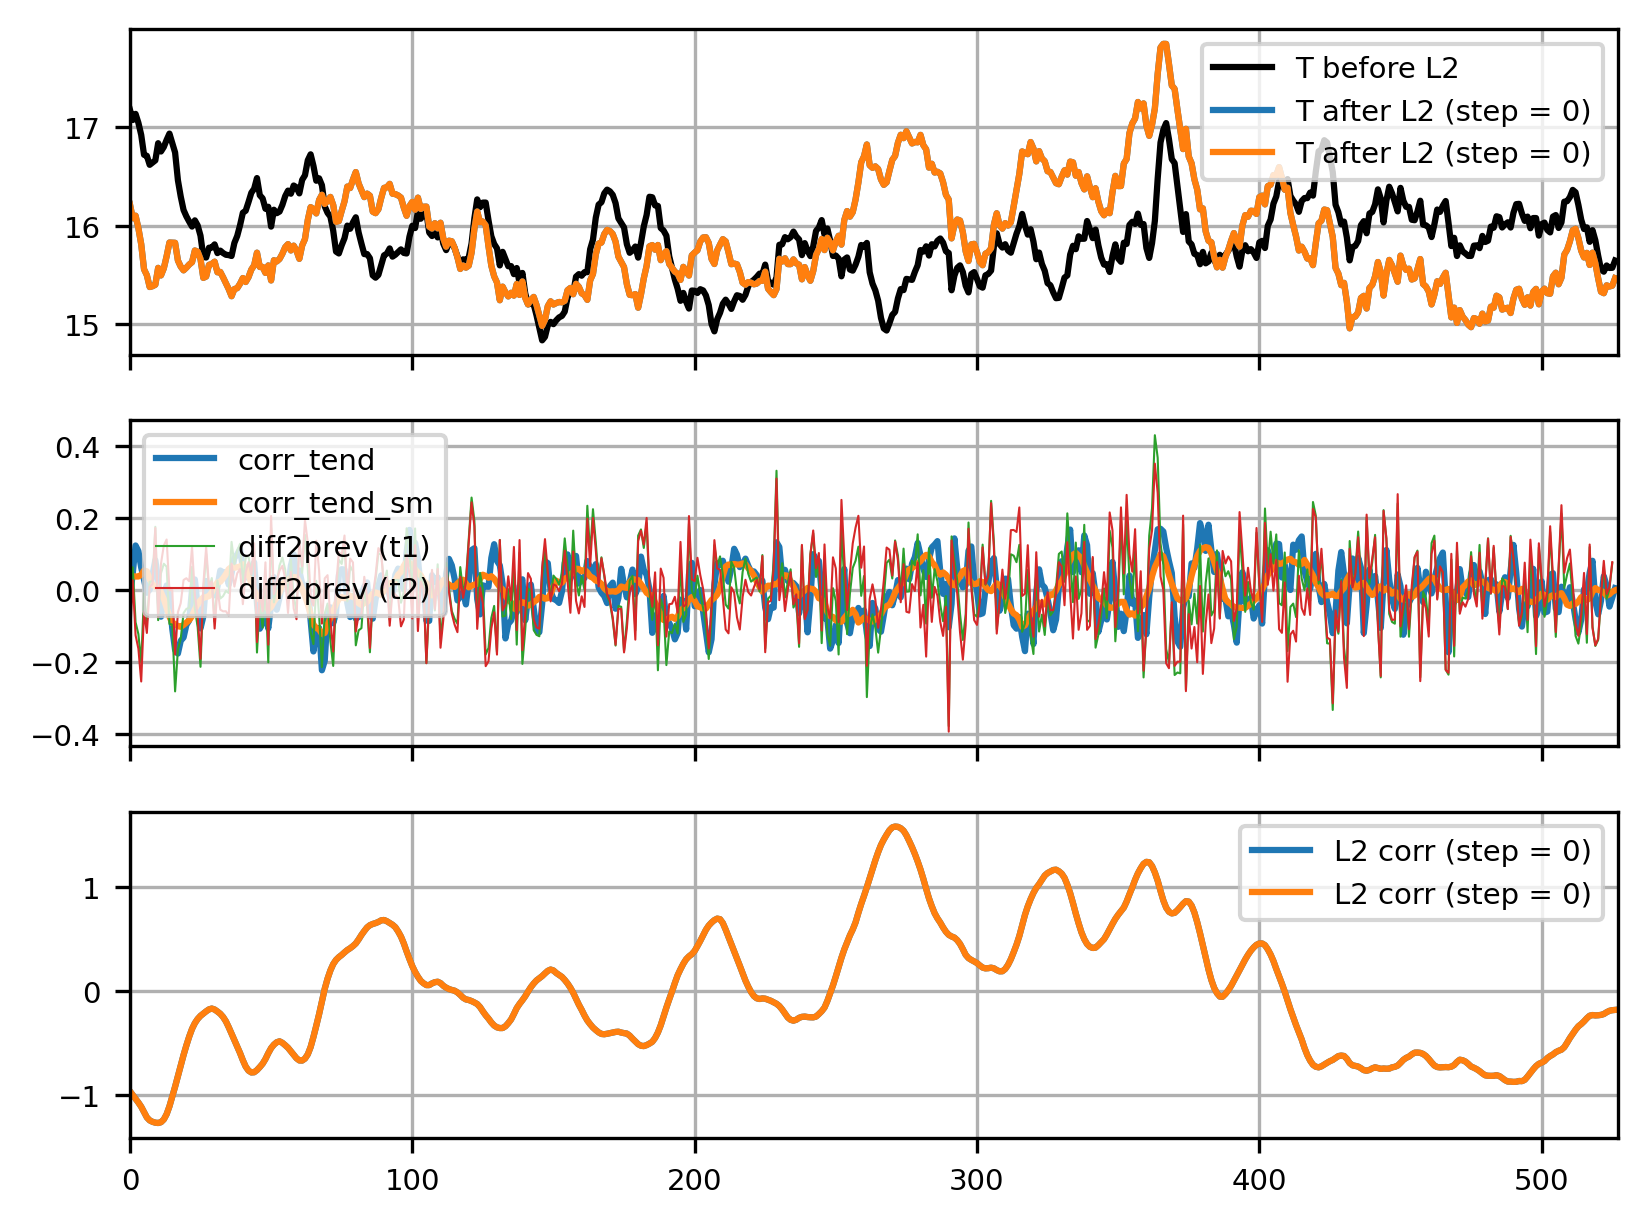

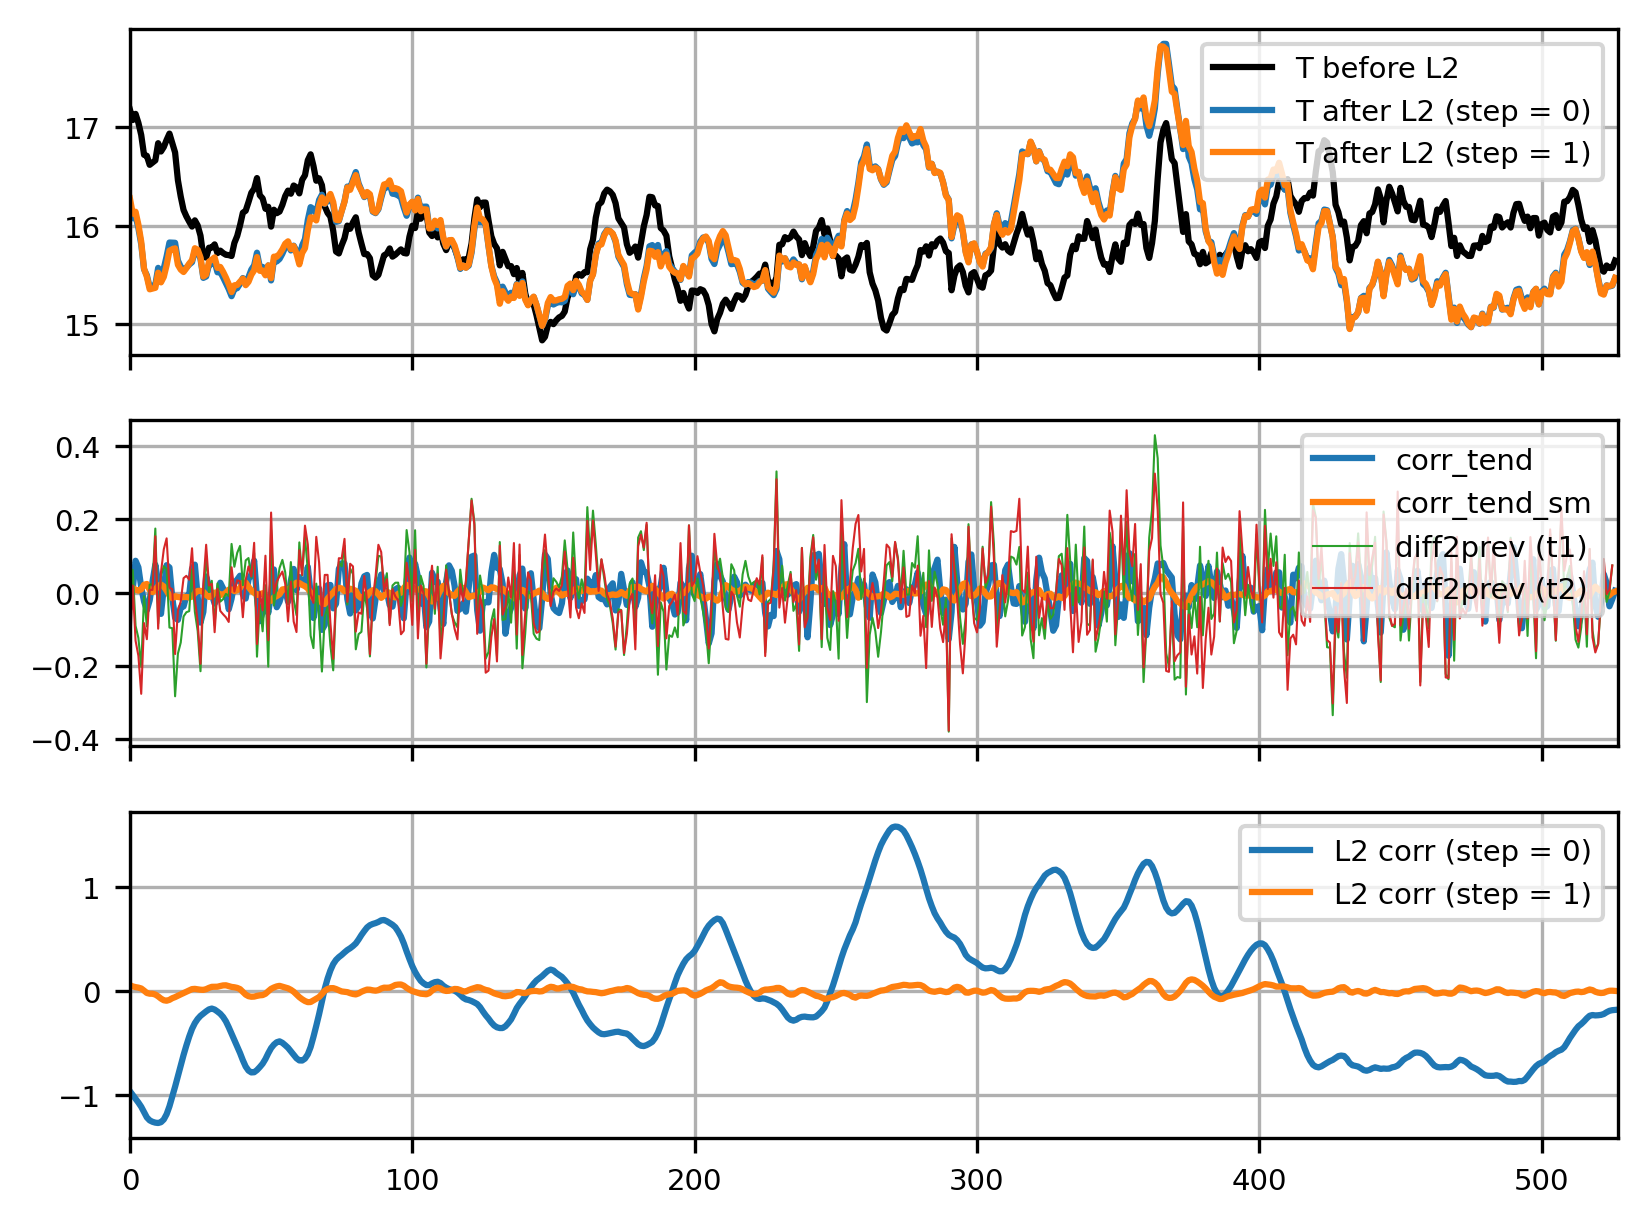

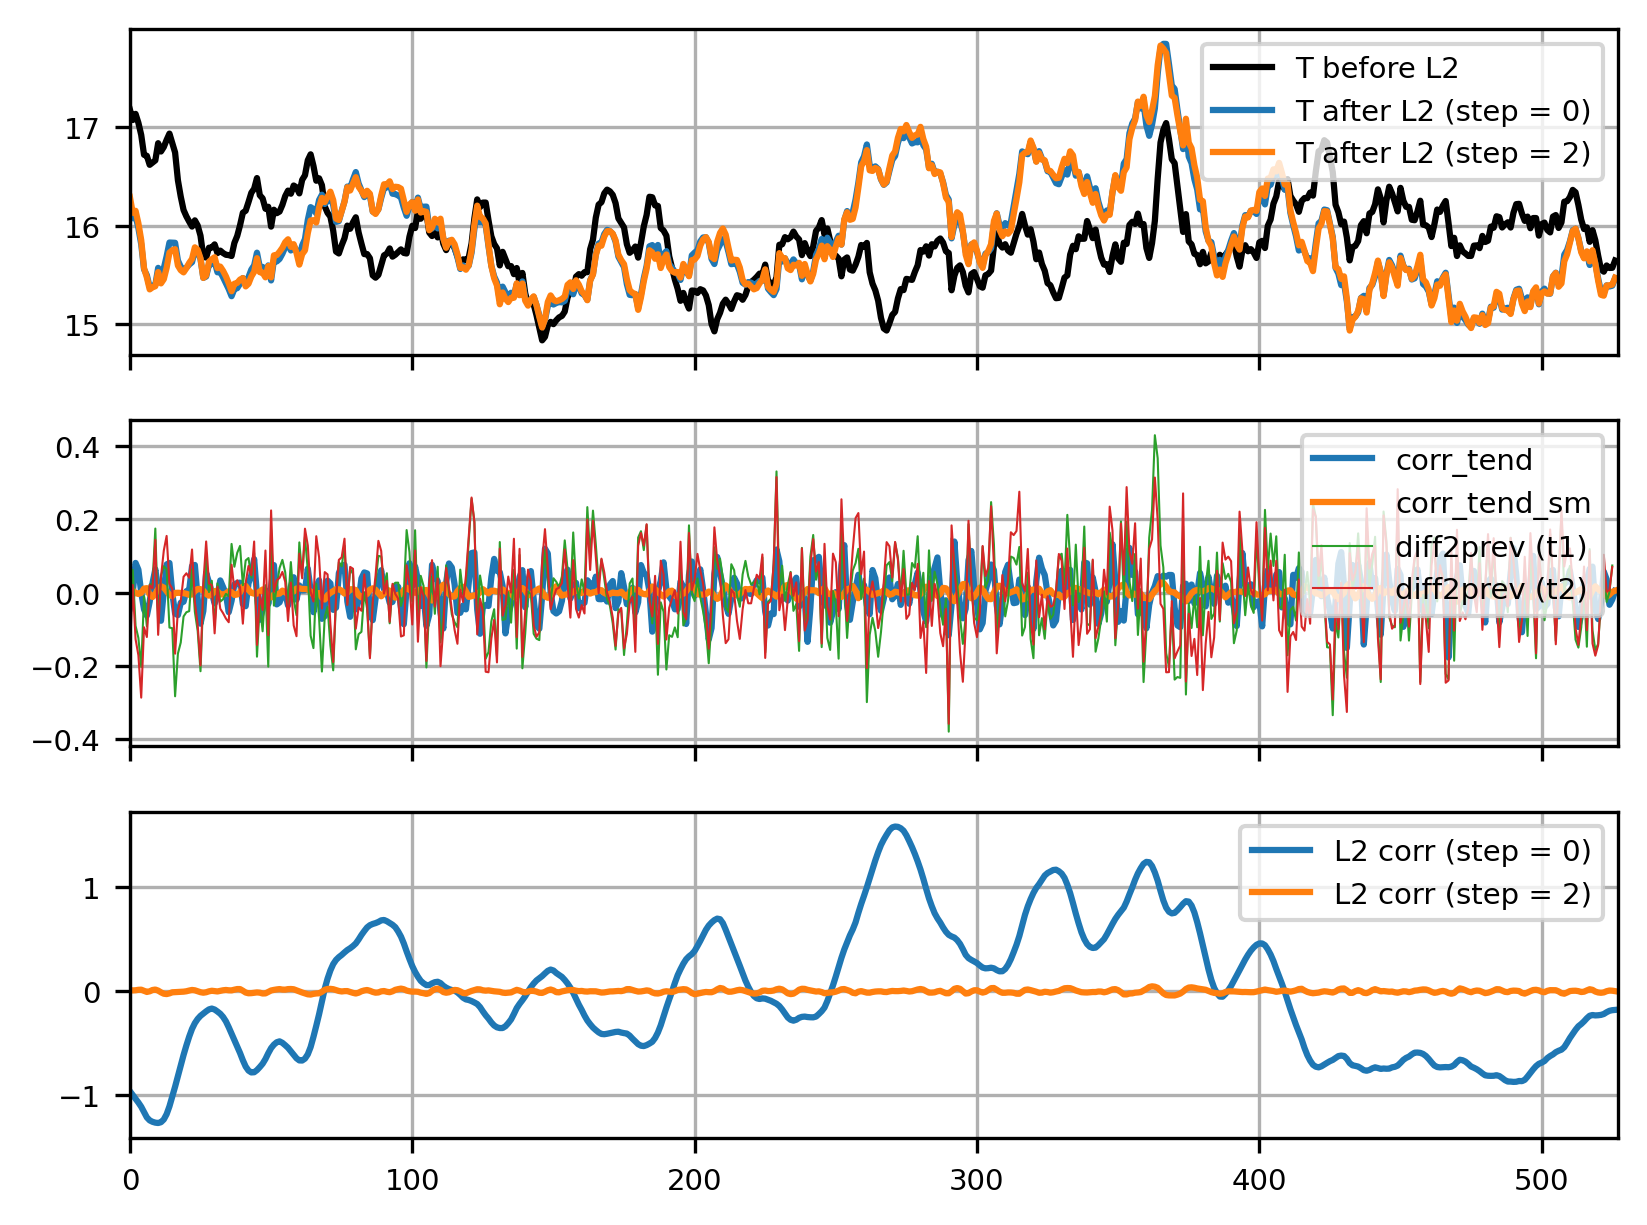

In [ ]:
corr_opts['detrend'] = True
img_array['t2'], diff_matrix['t2'] = IR_corrections.run_L2_corr (img_array['t1'], diff_matrix['t1'],
                                                                 corr_opts['detrend'], corr_opts['L2_nsteps'], corr_opts['L2_wnd'], 1, pics_dir = save_dir, fig_name = 'L2_corr', opts_str = opts_str)




100%|██████████| 527/527 [00:00<00:00, 2422.90it/s]


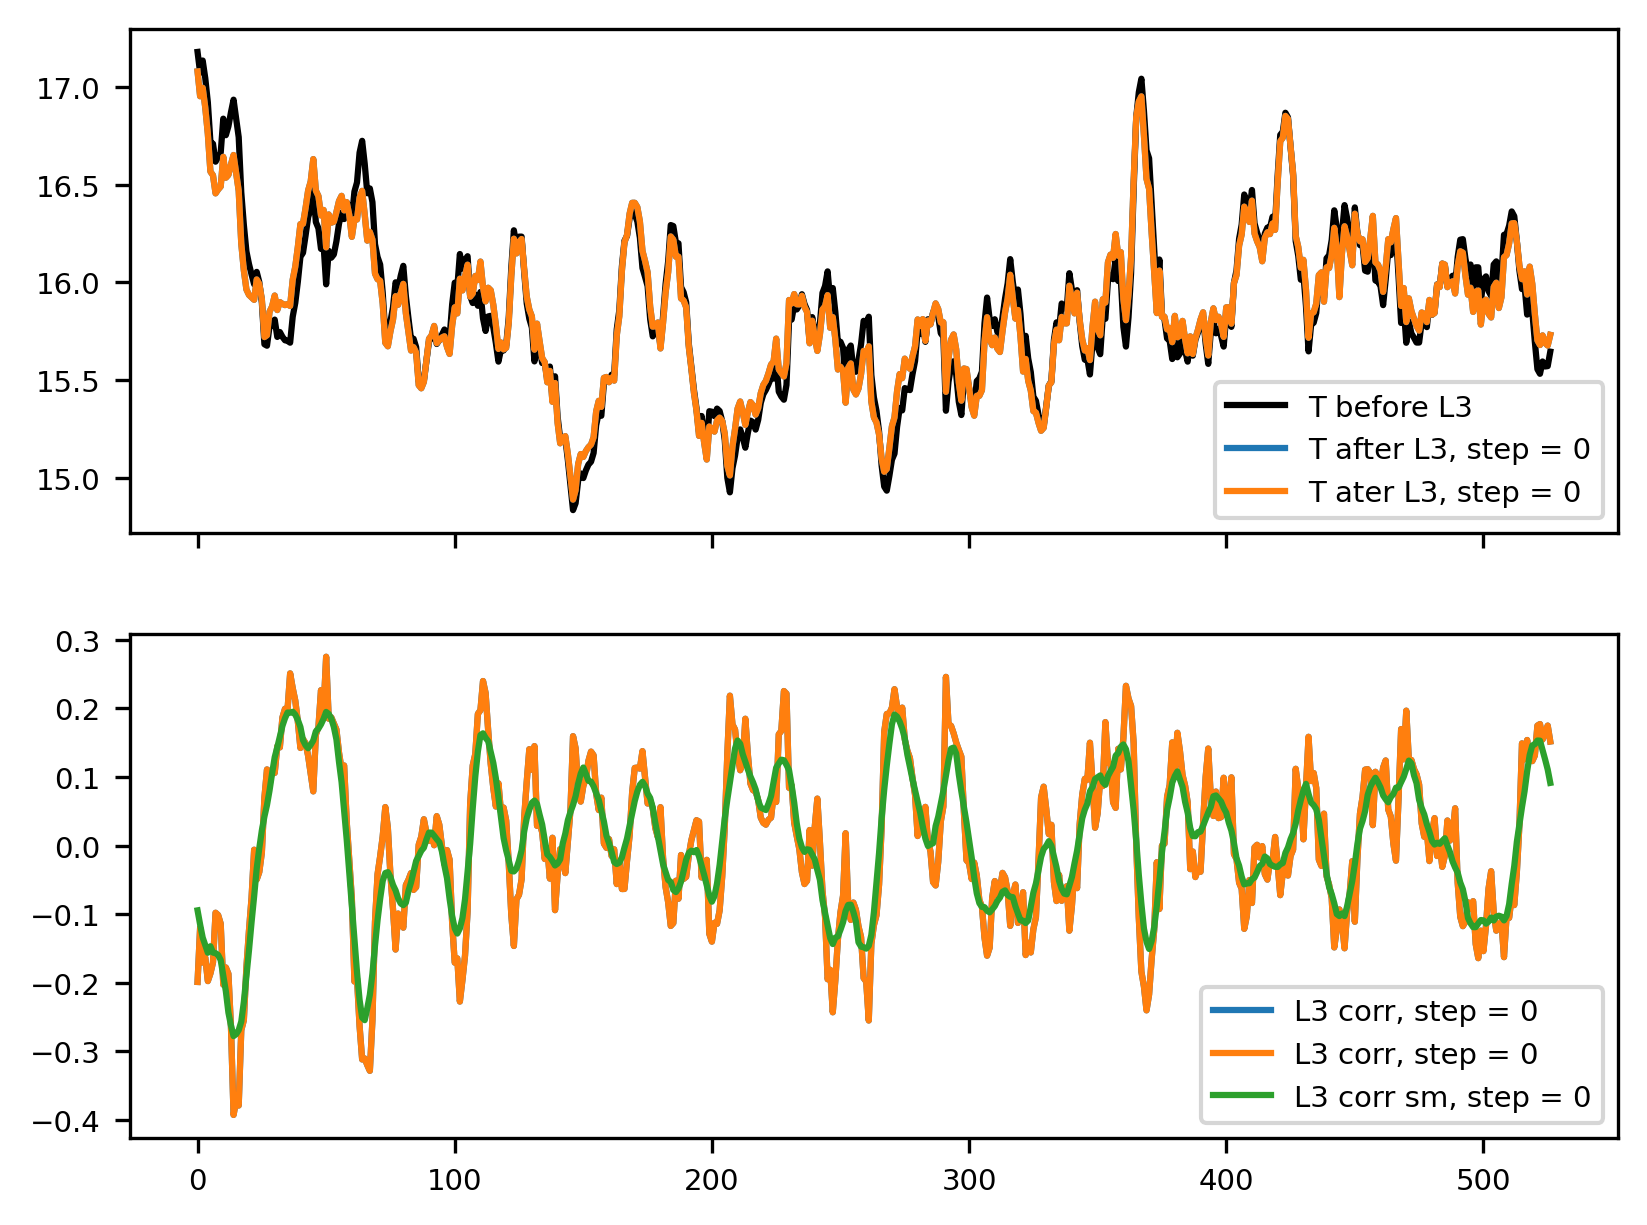

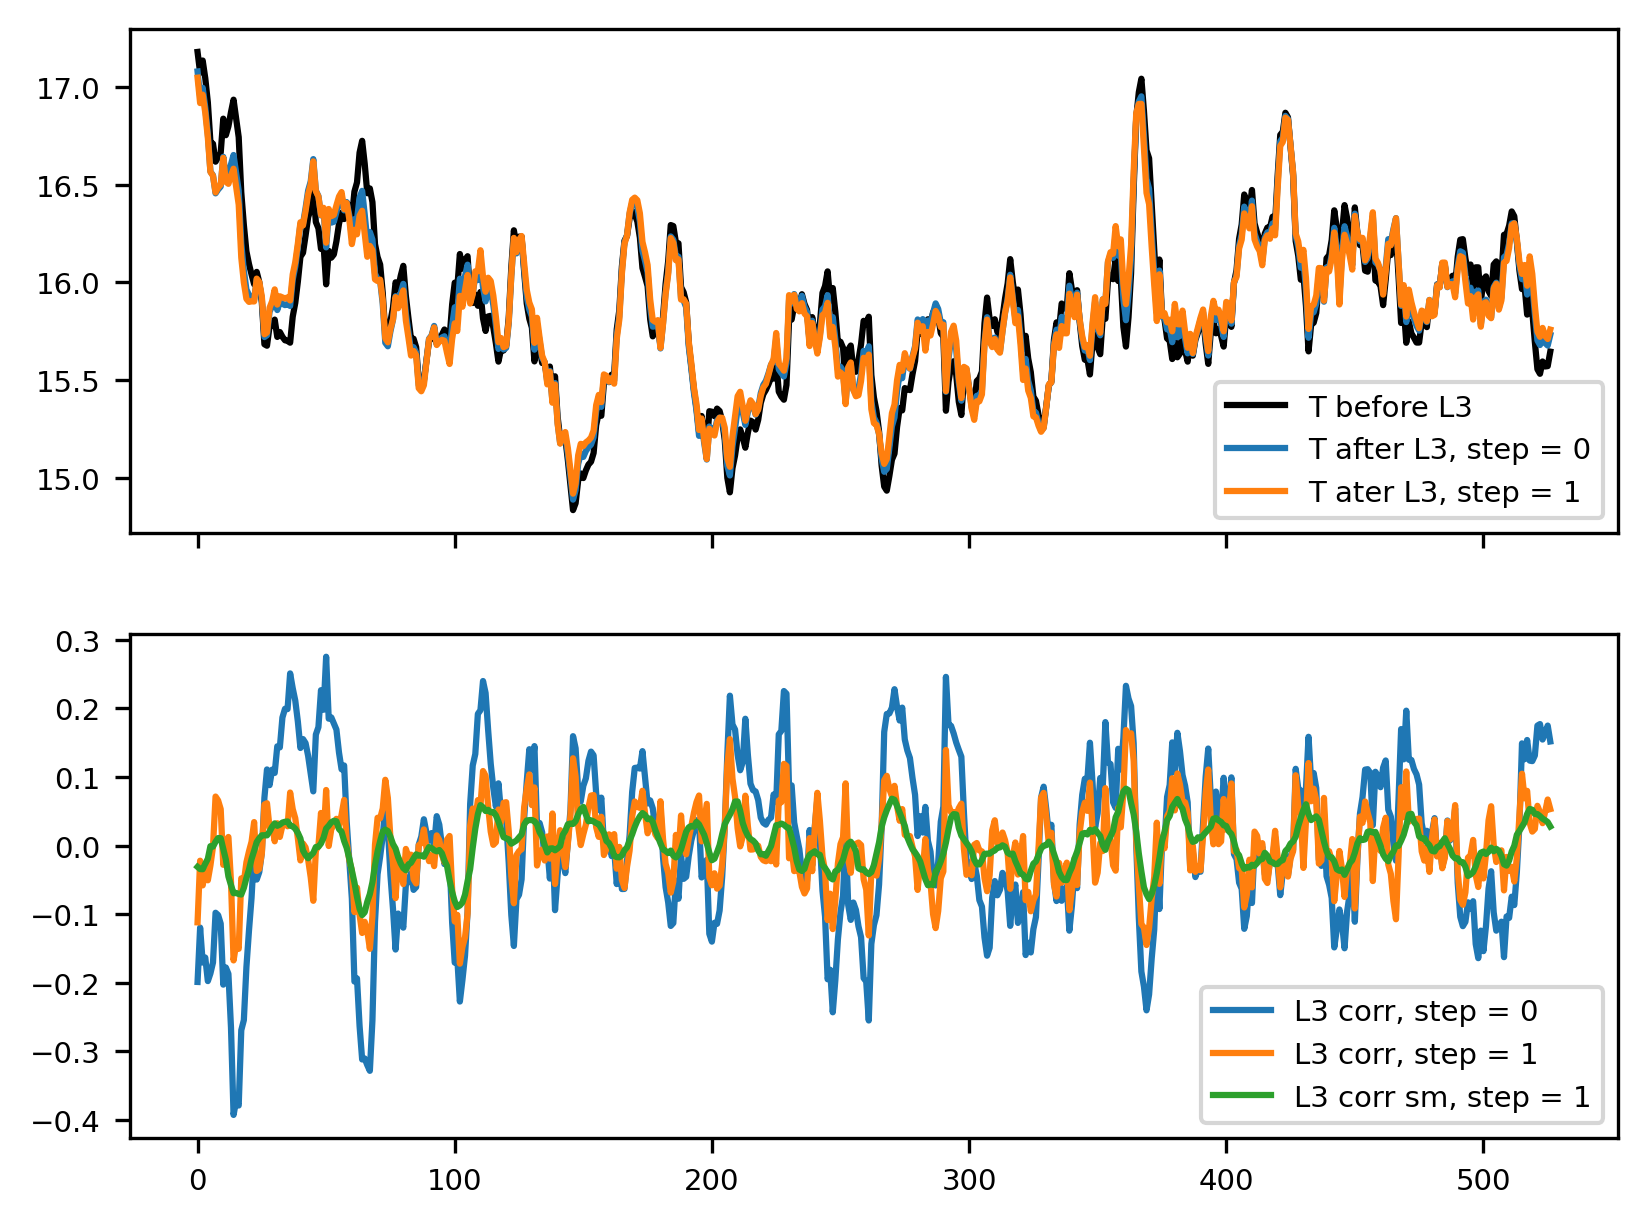

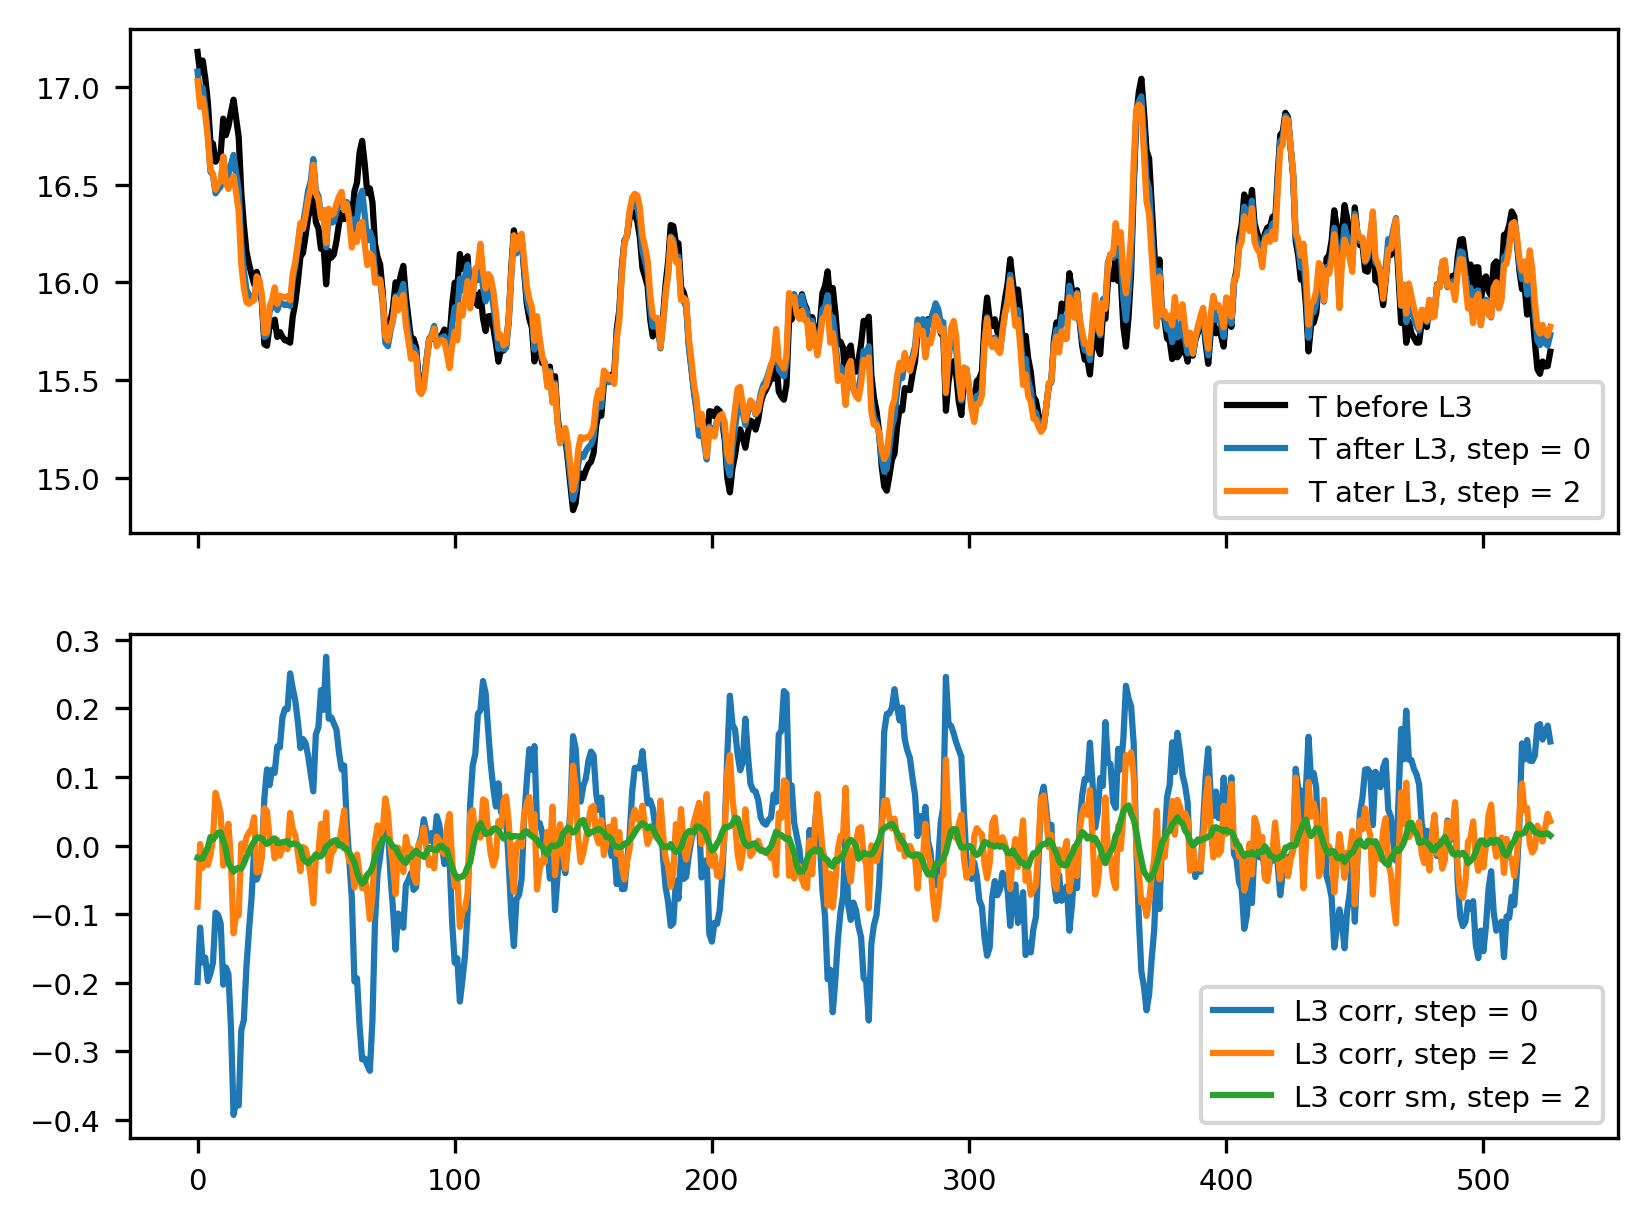

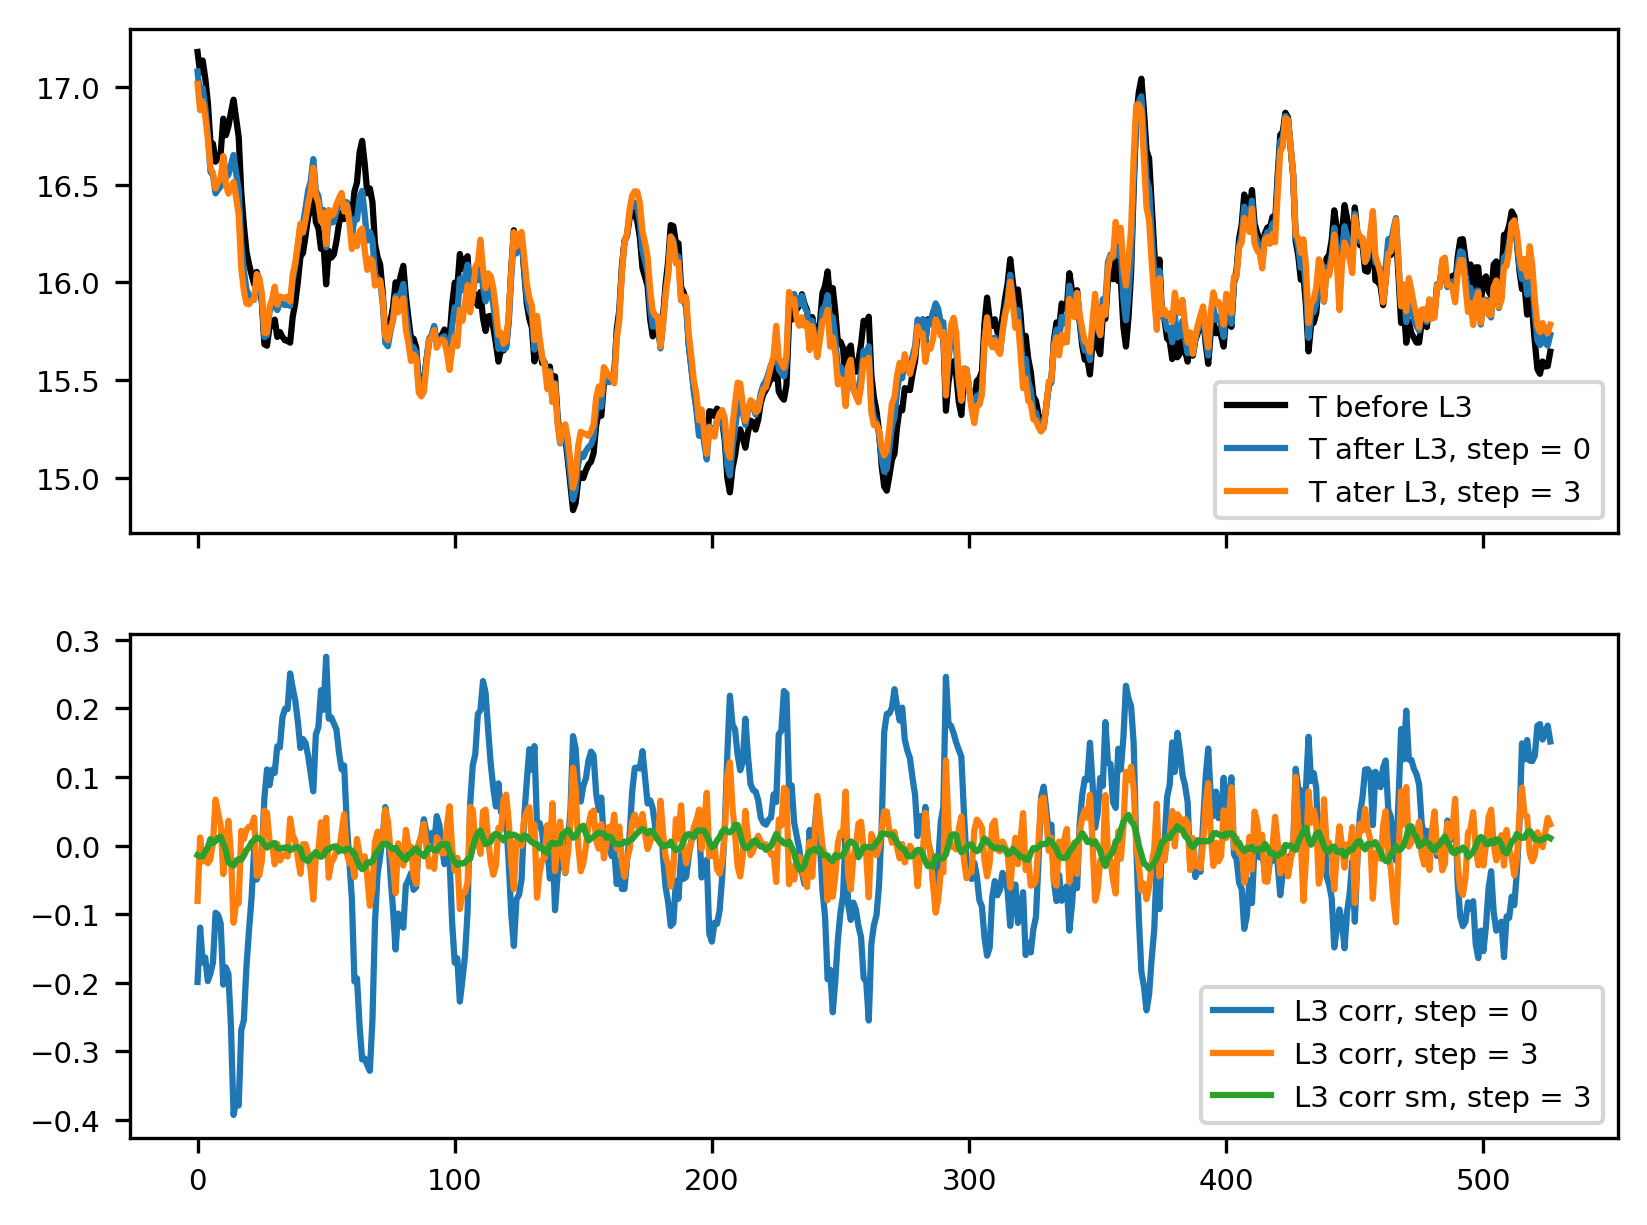

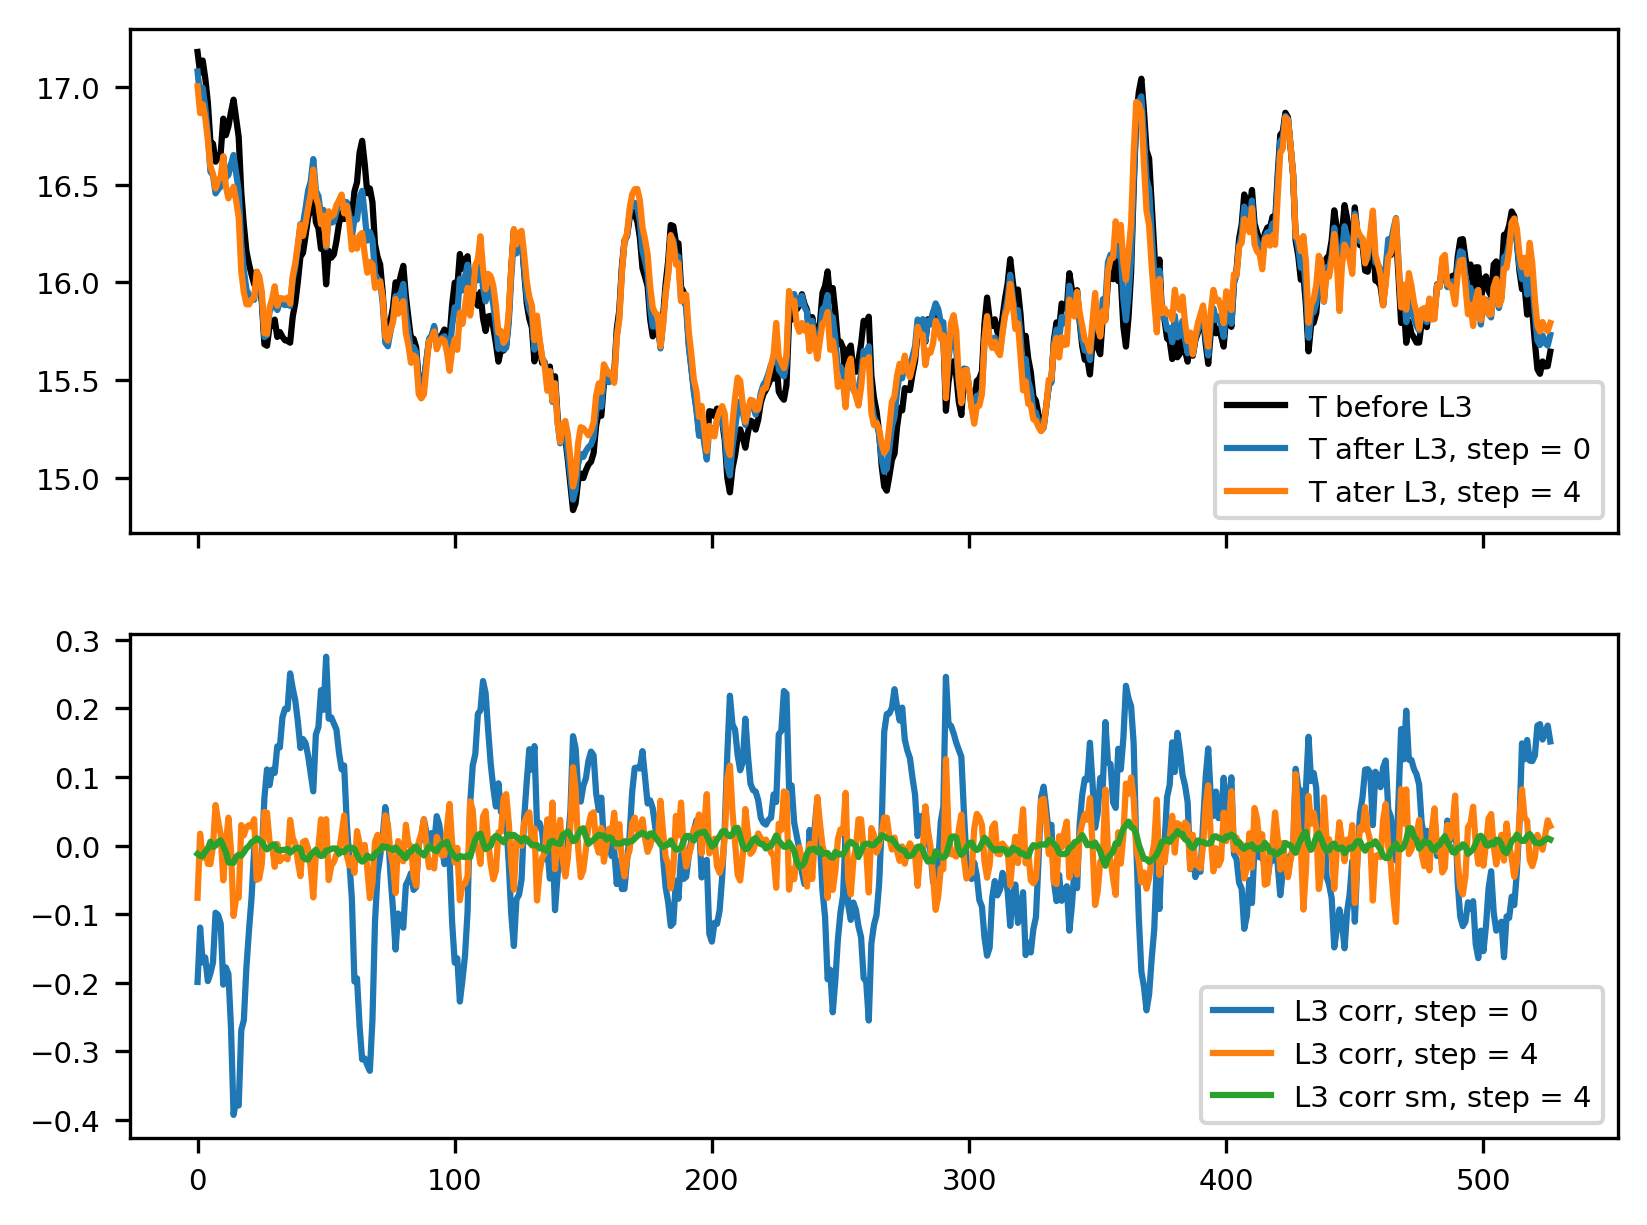

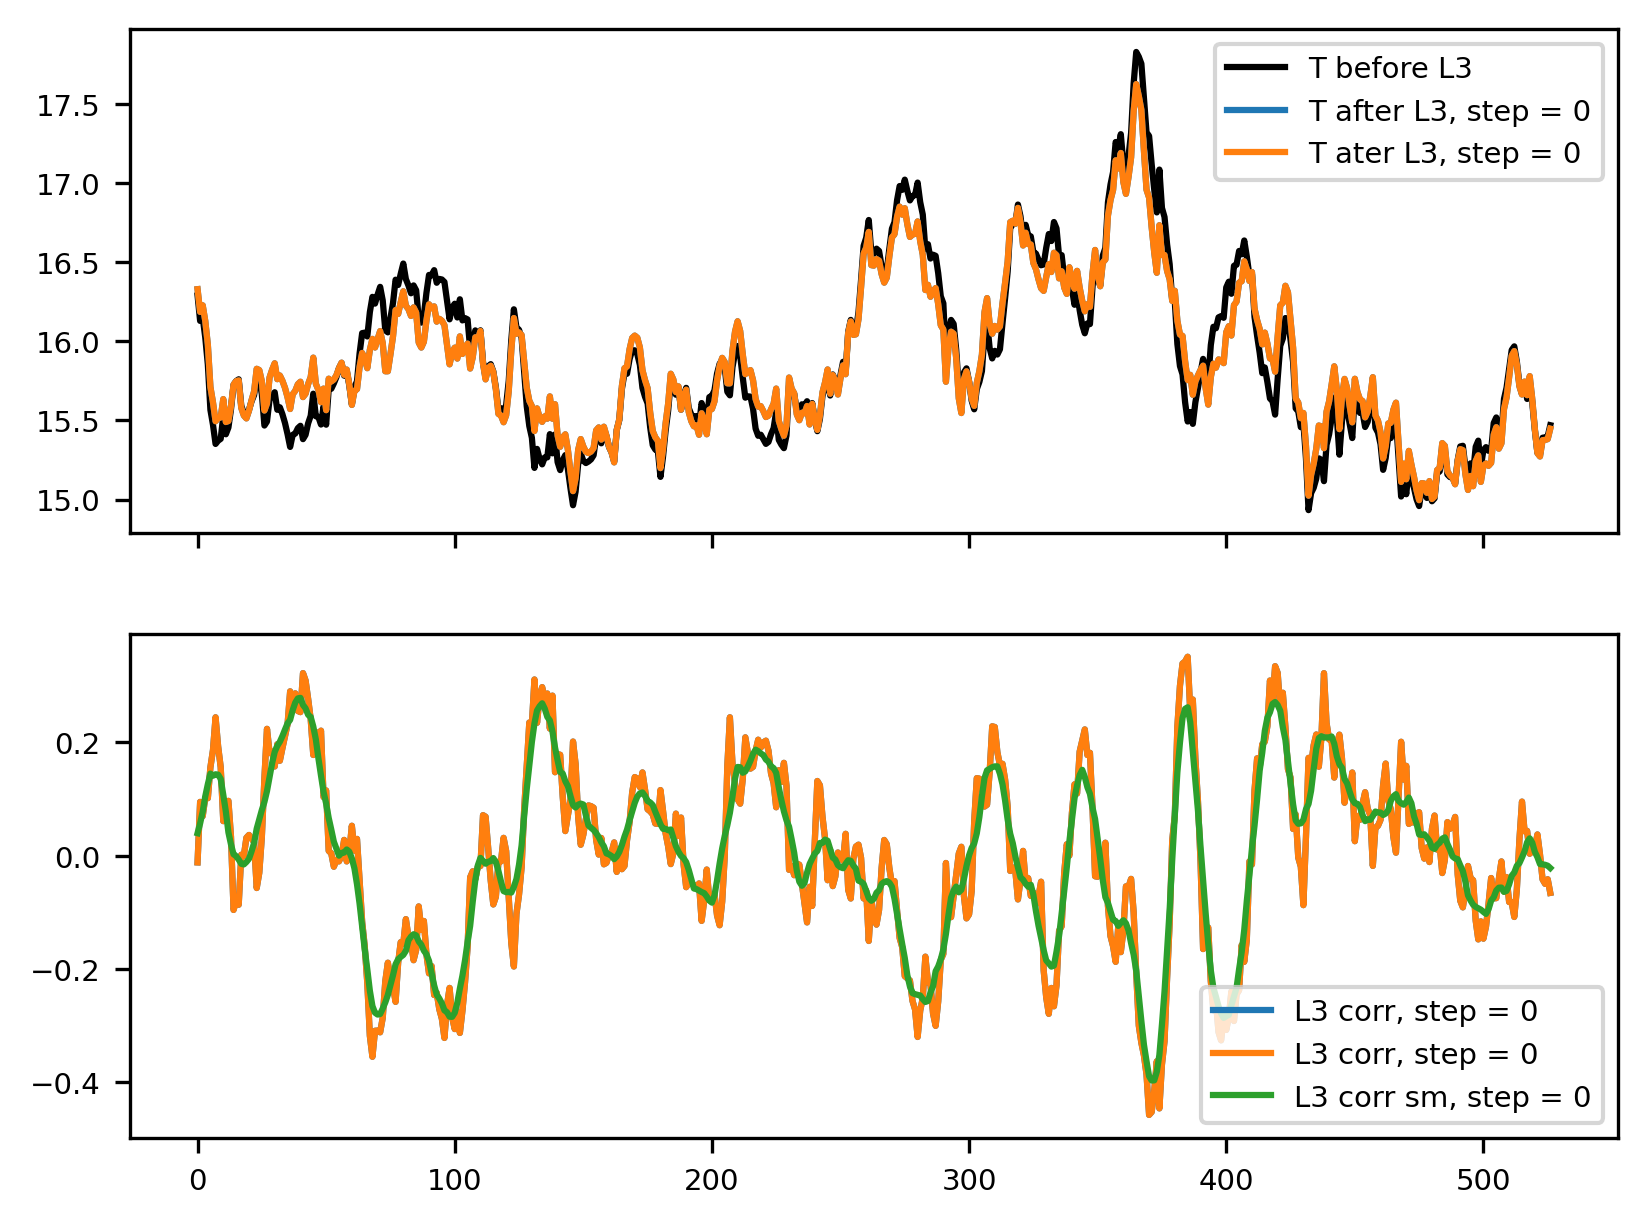

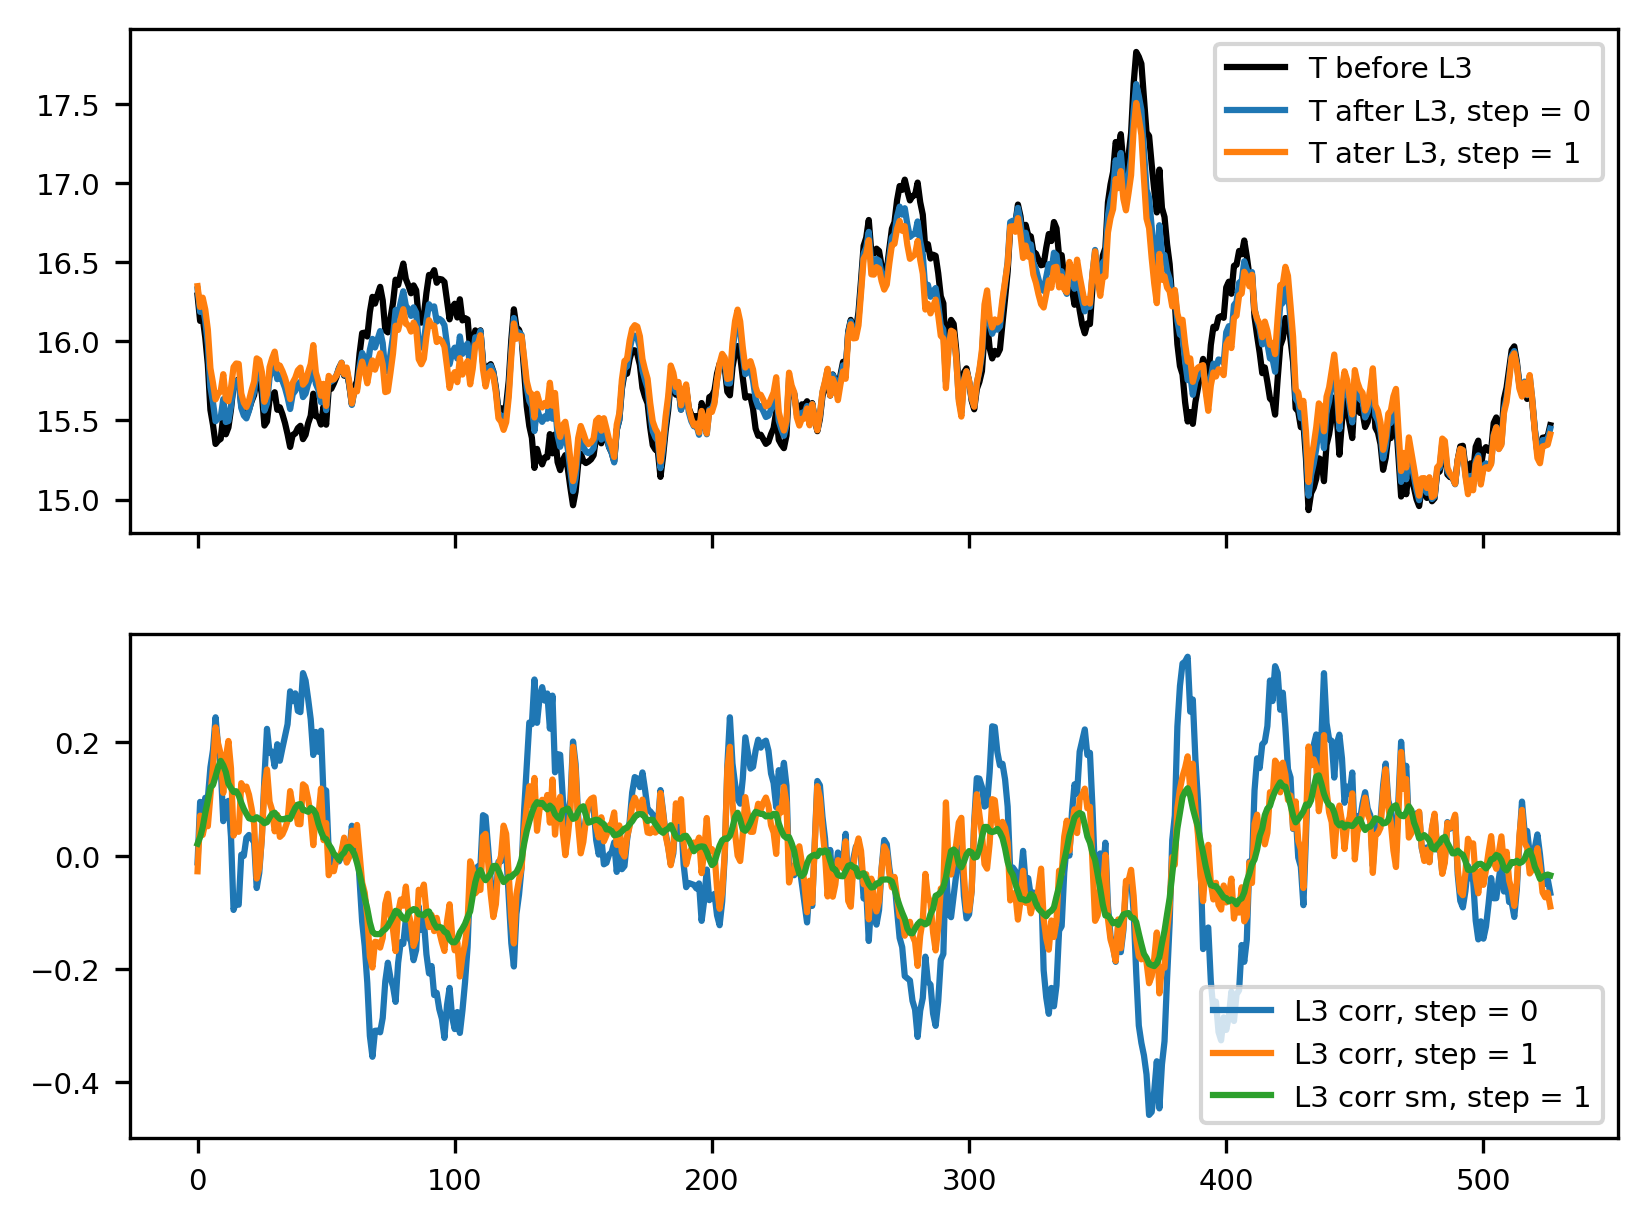

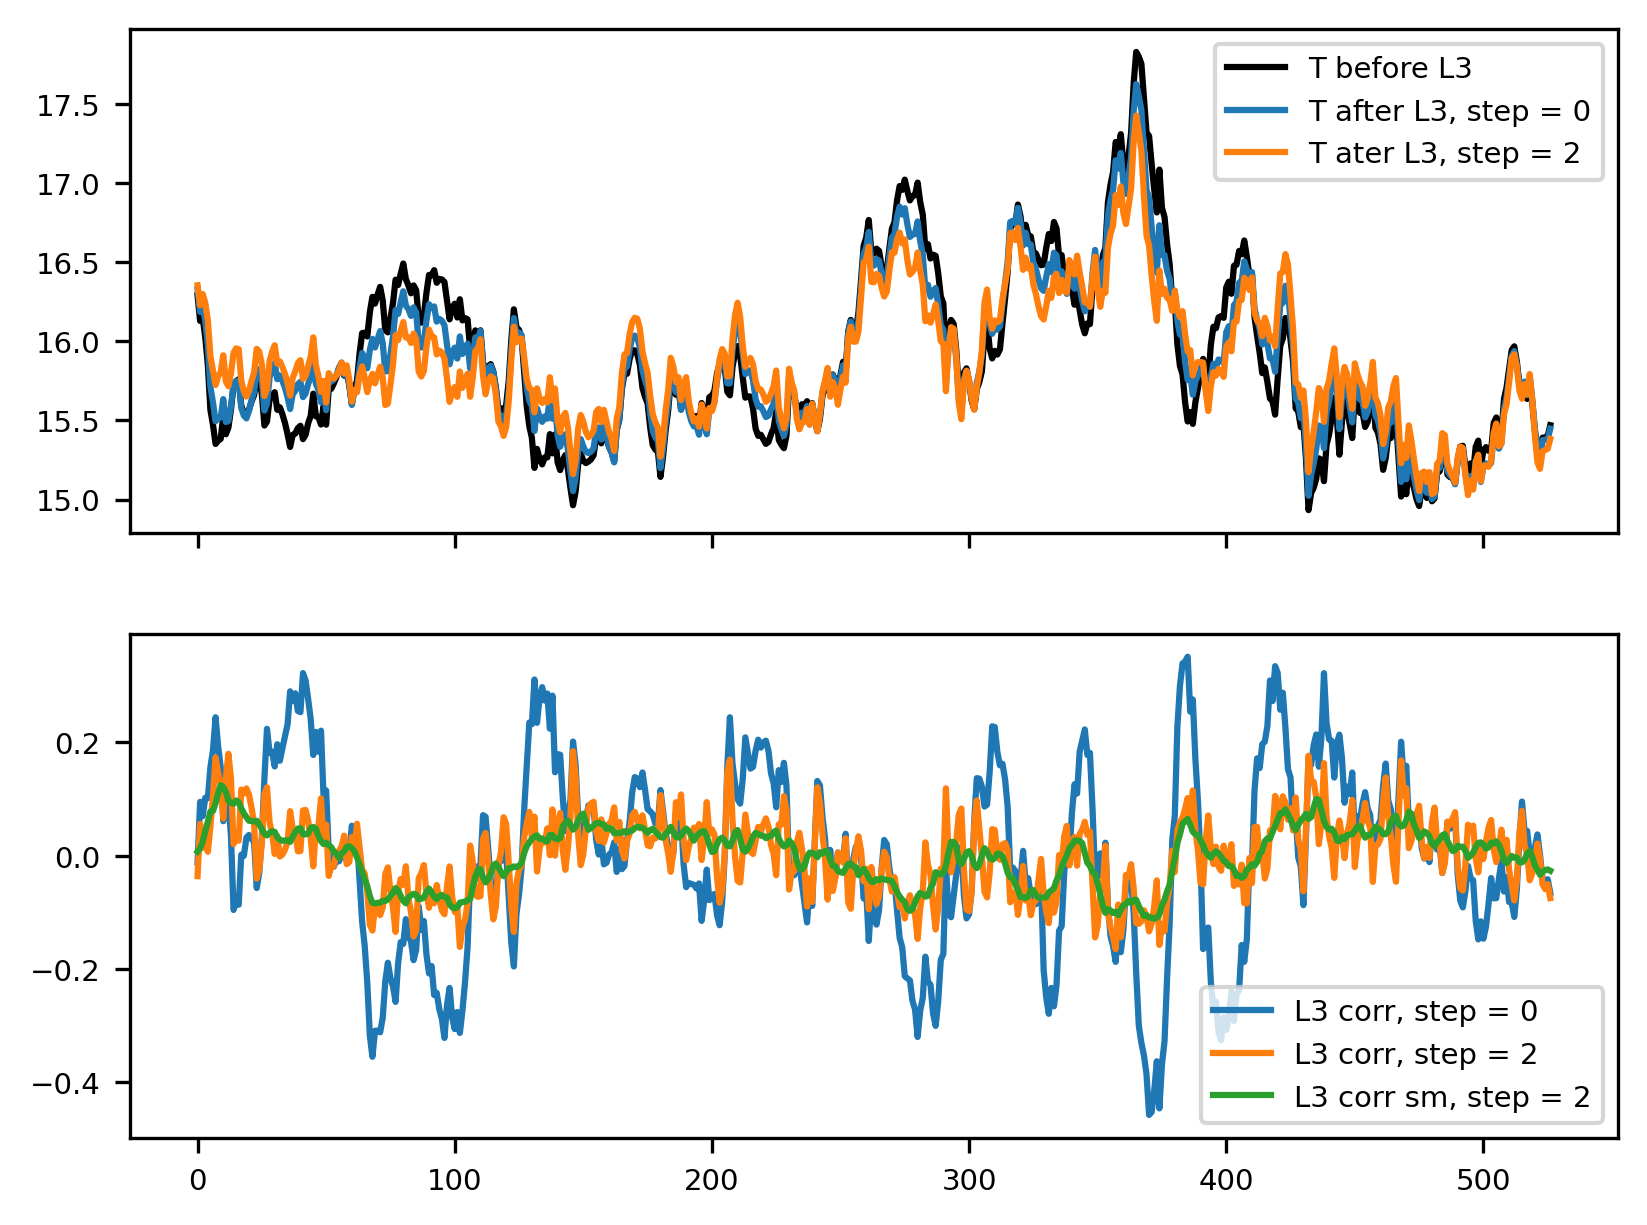

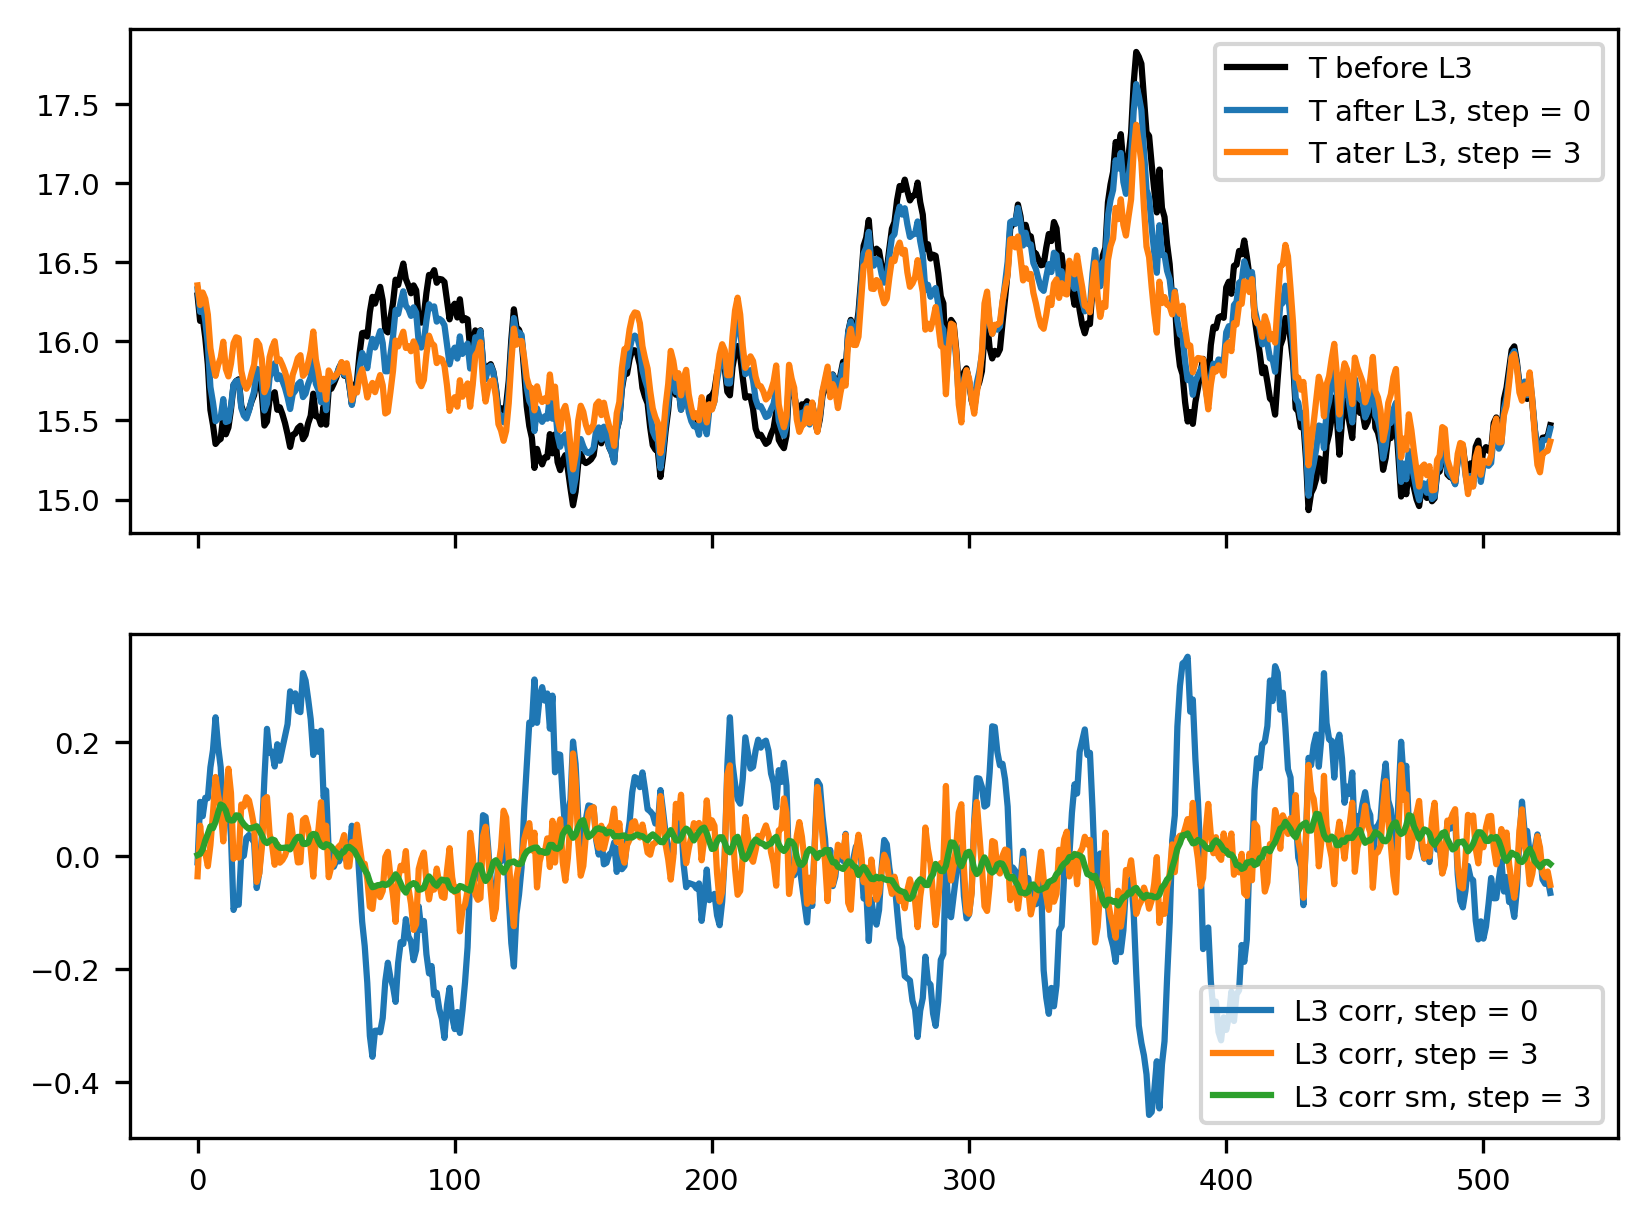

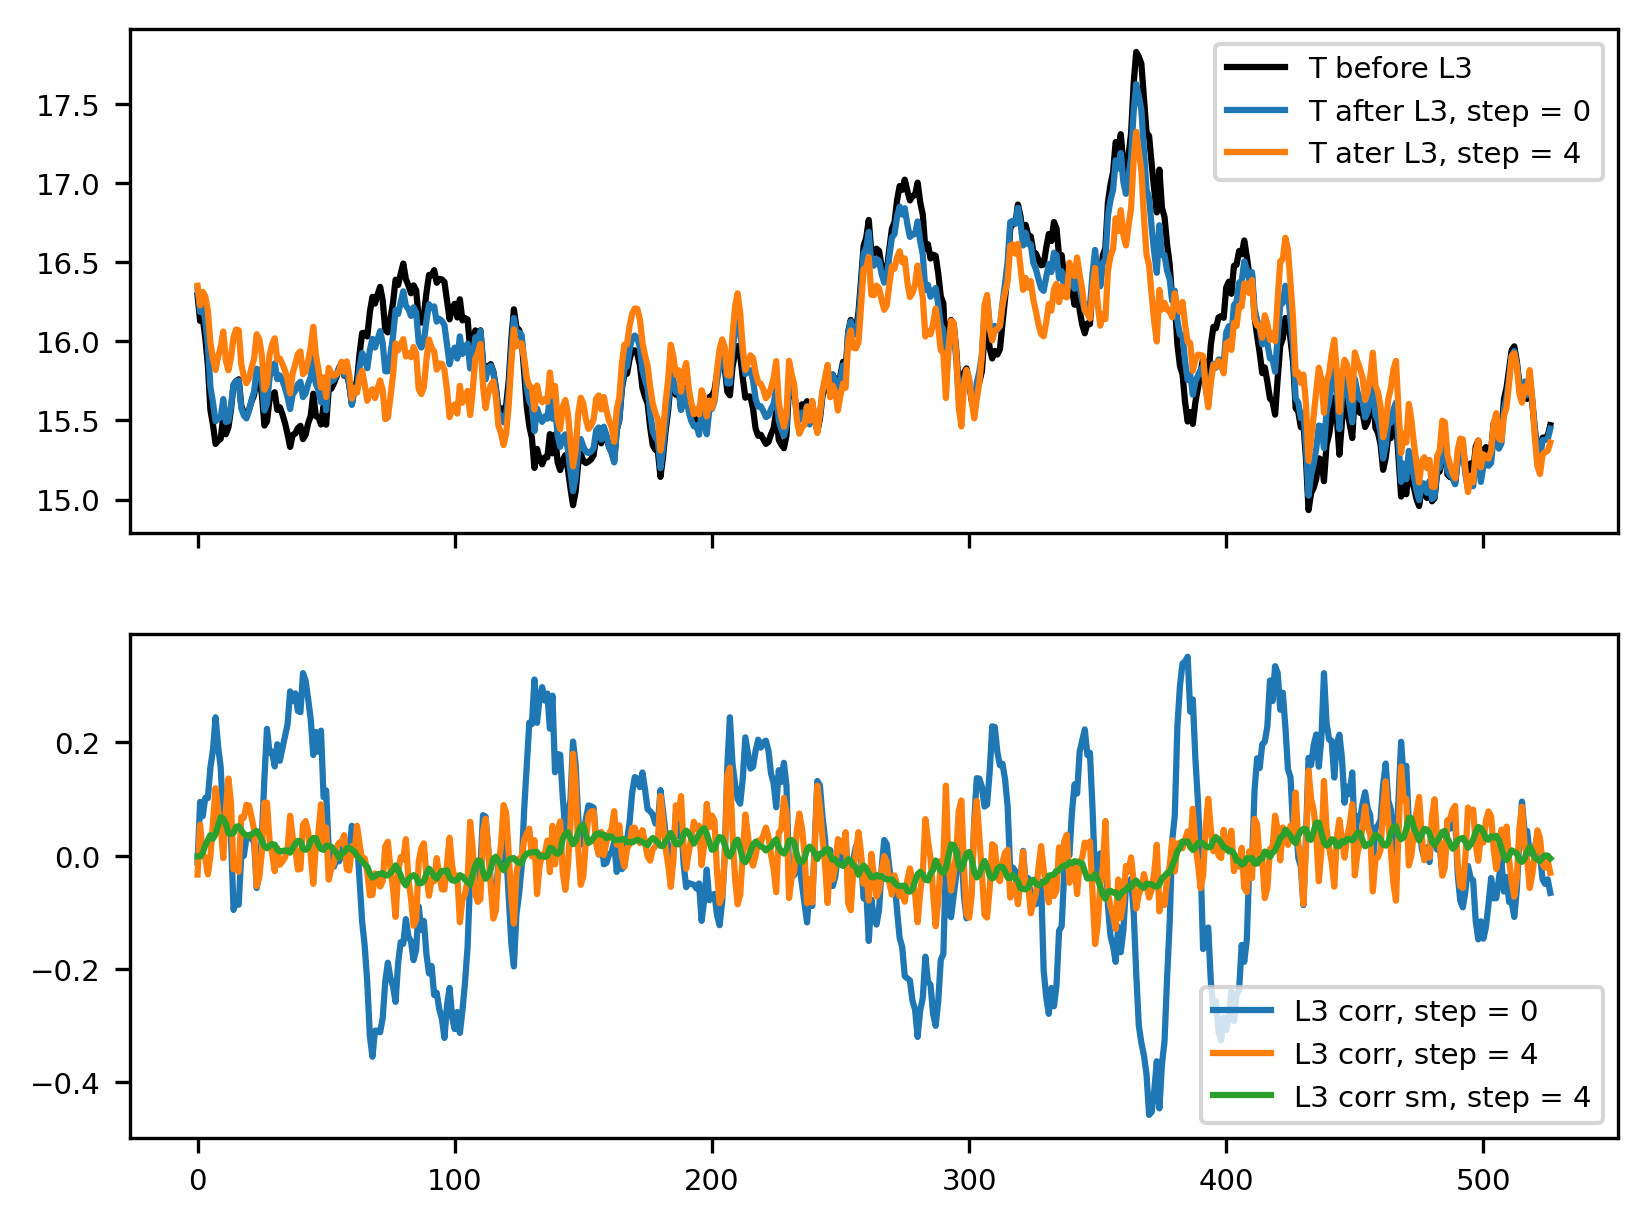

In [ ]:
img_array['t31'], diff_matrix['t31'] = IR_corrections.run_L3_corr (img_array['t1'], img_df, diff_matrix['t1'], diff_weights,
                                                                   corr_opts['L3_nsteps'], corr_opts['L3_wnd'], pics_dir = save_dir, fig_name = 'L31_corr', opts_str = opts_str)

img_array['t32'], diff_matrix['t32'] = IR_corrections.run_L3_corr (img_array['t2'], img_df, diff_matrix['t2'], diff_weights,
                                                                   corr_opts['L3_nsteps'], corr_opts['L3_wnd'], pics_dir = save_dir, fig_name = 'L32_corr', opts_str = opts_str)




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


identify_swaths4df(): segment 0 reached 29

identify_swaths4df(): segment 1 reached -35

identify_swaths4df(): segment 2 reached 27

identify_swaths4df(): segment 3 reached -34

identify_swaths4df(): segment 4 reached 28

identify_swaths4df(): segment 5 reached -35

identify_swaths4df(): segment 6 reached 27

identify_swaths4df(): segment 7 reached -36

identify_swaths4df(): segment 8 reached 27

identify_swaths4df(): segment 9 reached -36

identify_swaths4df(): segment 10 reached 28

identify_swaths4df(): segment 11 reached -36

identify_swaths4df(): segment 12 reached 28

identify_swaths4df(): segment 13 reached -36

identify_swaths4df(): segment 14 reached 27

identify_swaths4df(): segment 15 reached -38

identify_swaths4df(): segment 16 reached 26



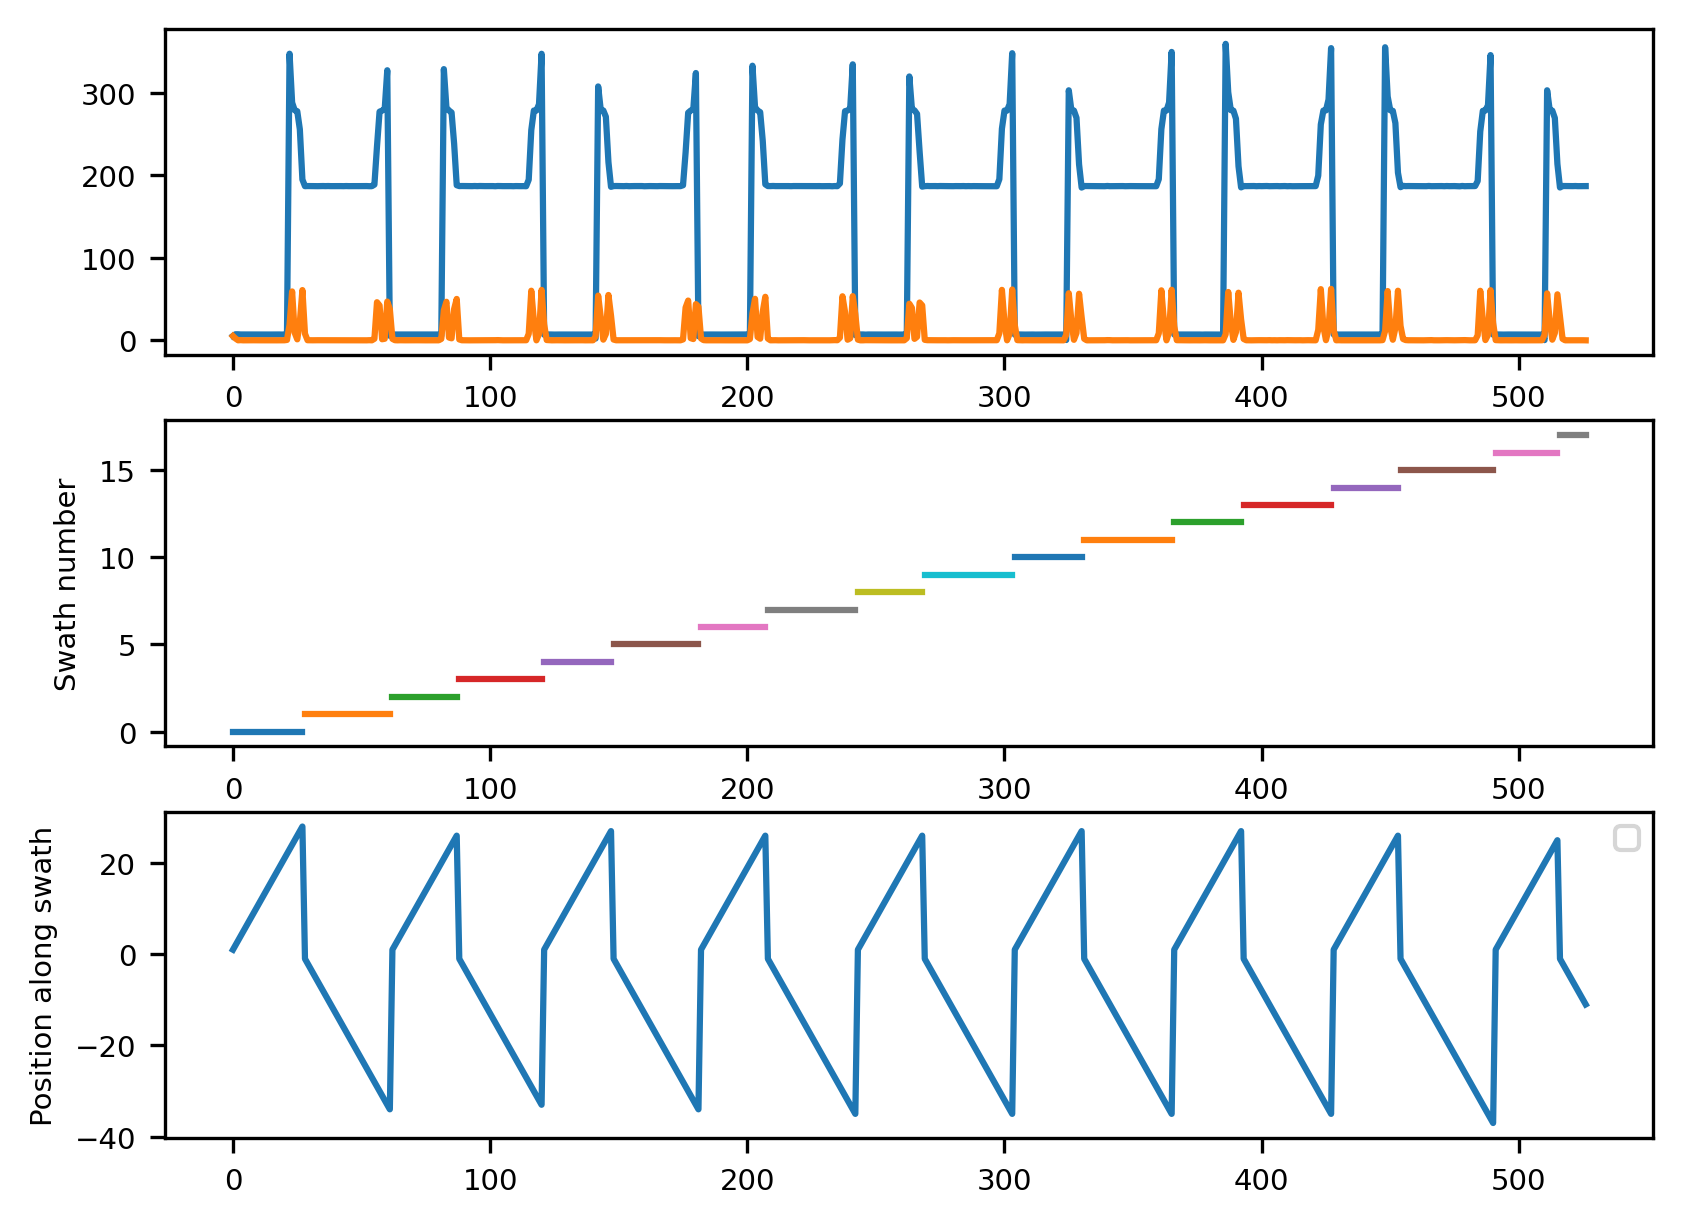

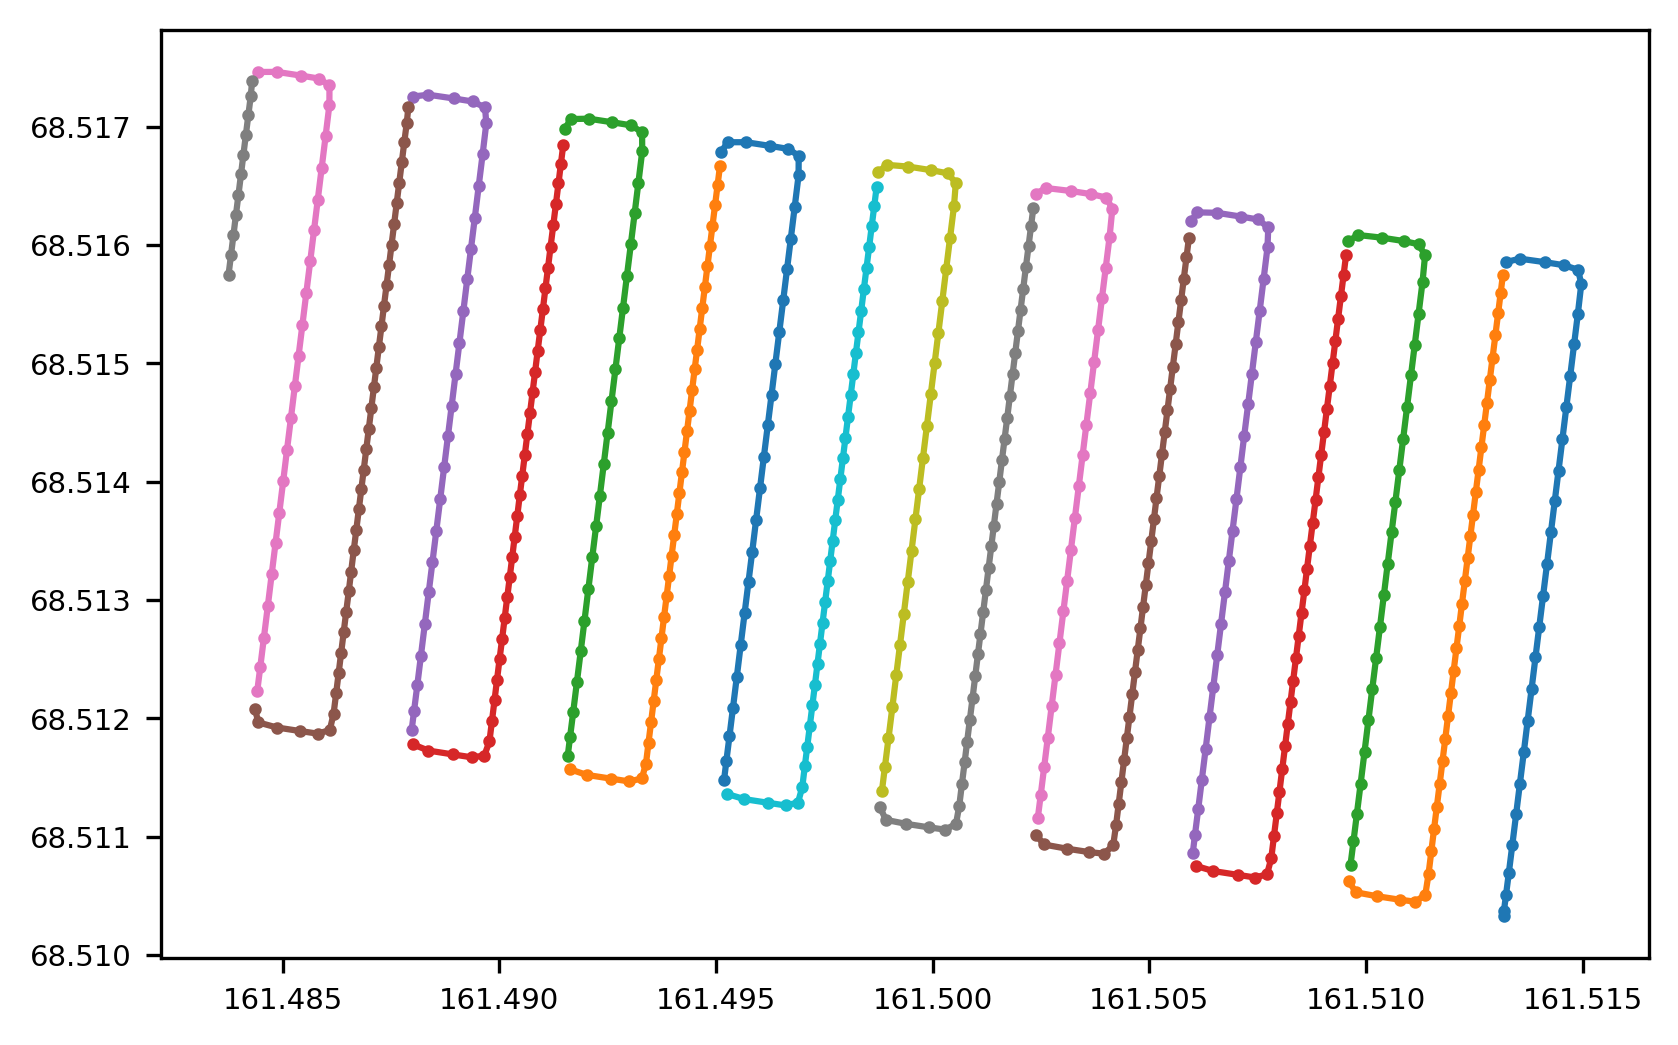

c:\Anaconda\envs\GIS\Lib\site-packages\lowess\lowess.py:70: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15.664622524732666' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  ySmooth[index] = wLstSqReg(x[points], y[points], polynomialDegree,
c:\Anaconda\envs\GIS\Lib\site-packages\lowess\lowess.py:70: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '16.190337795614127' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  ySmooth[index] = wLstSqReg(x[points], y[points], polynomialDegree,
100%|██████████| 527/527 [00:00<00:00, 2334.18it/s]


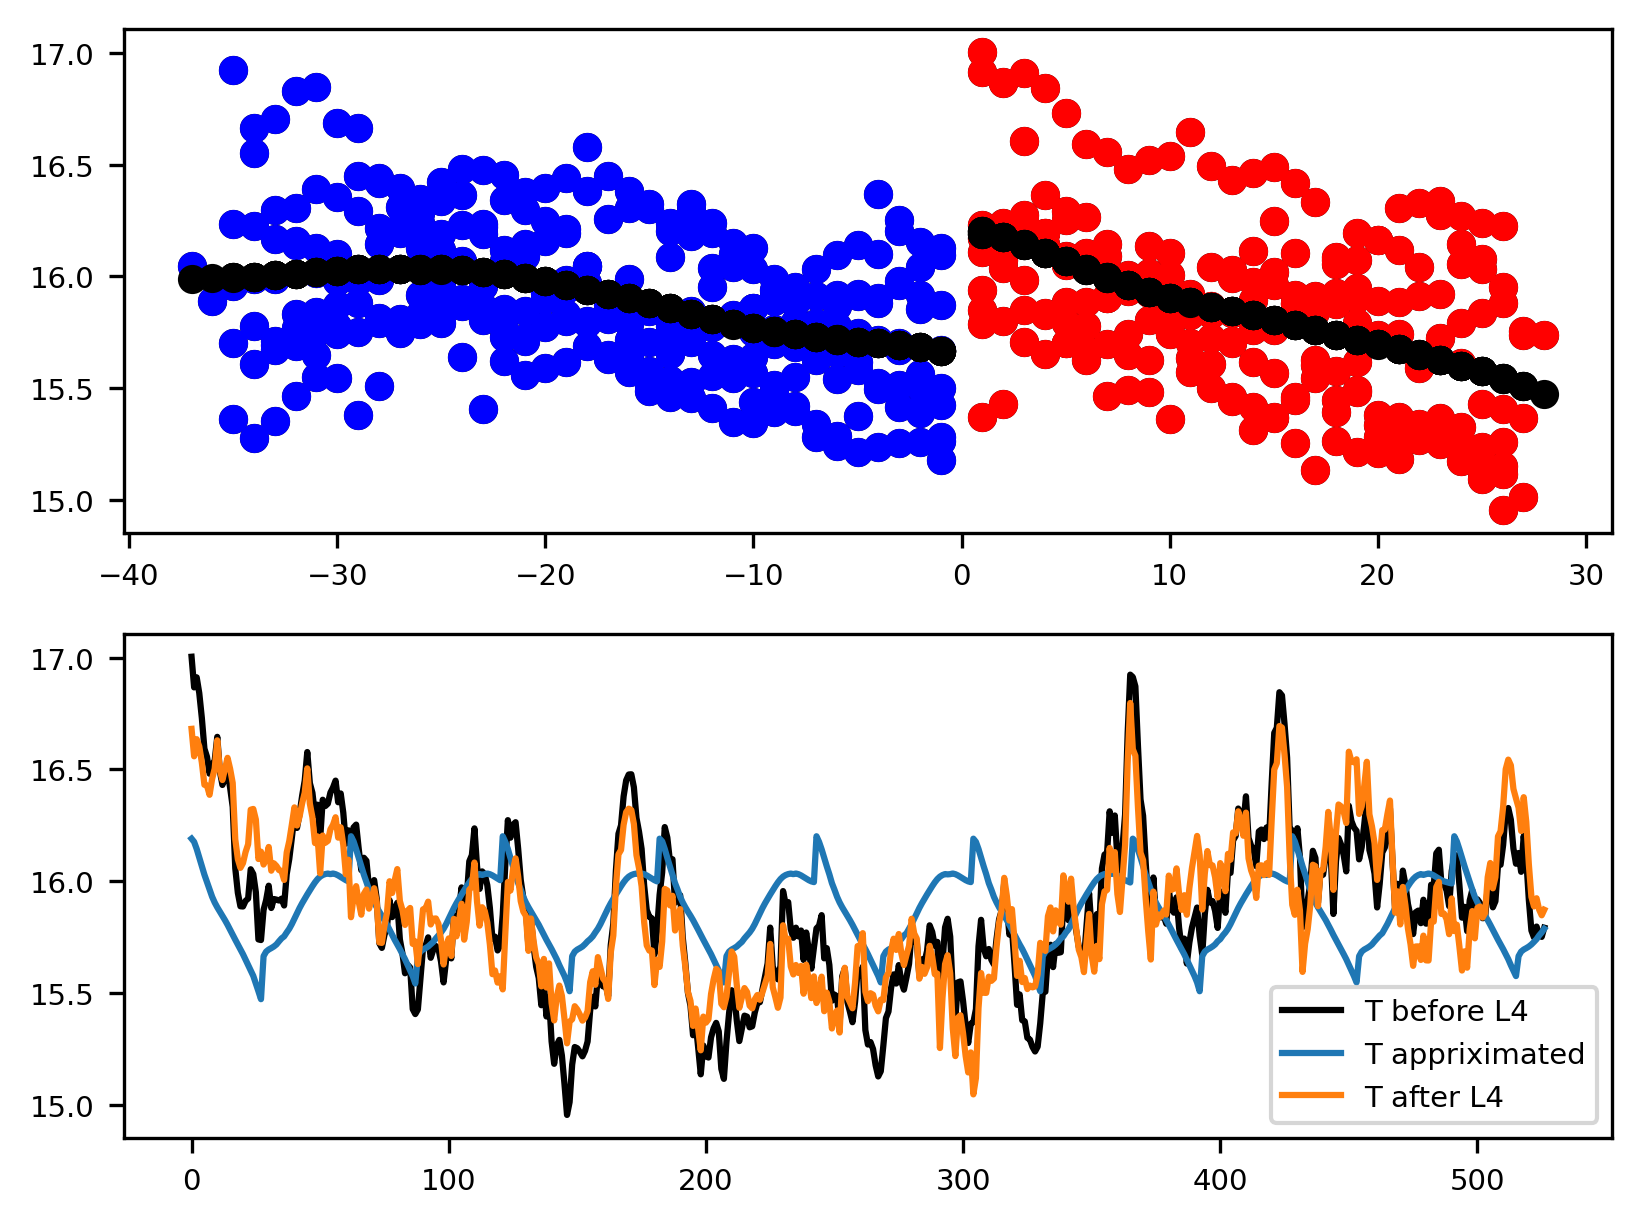

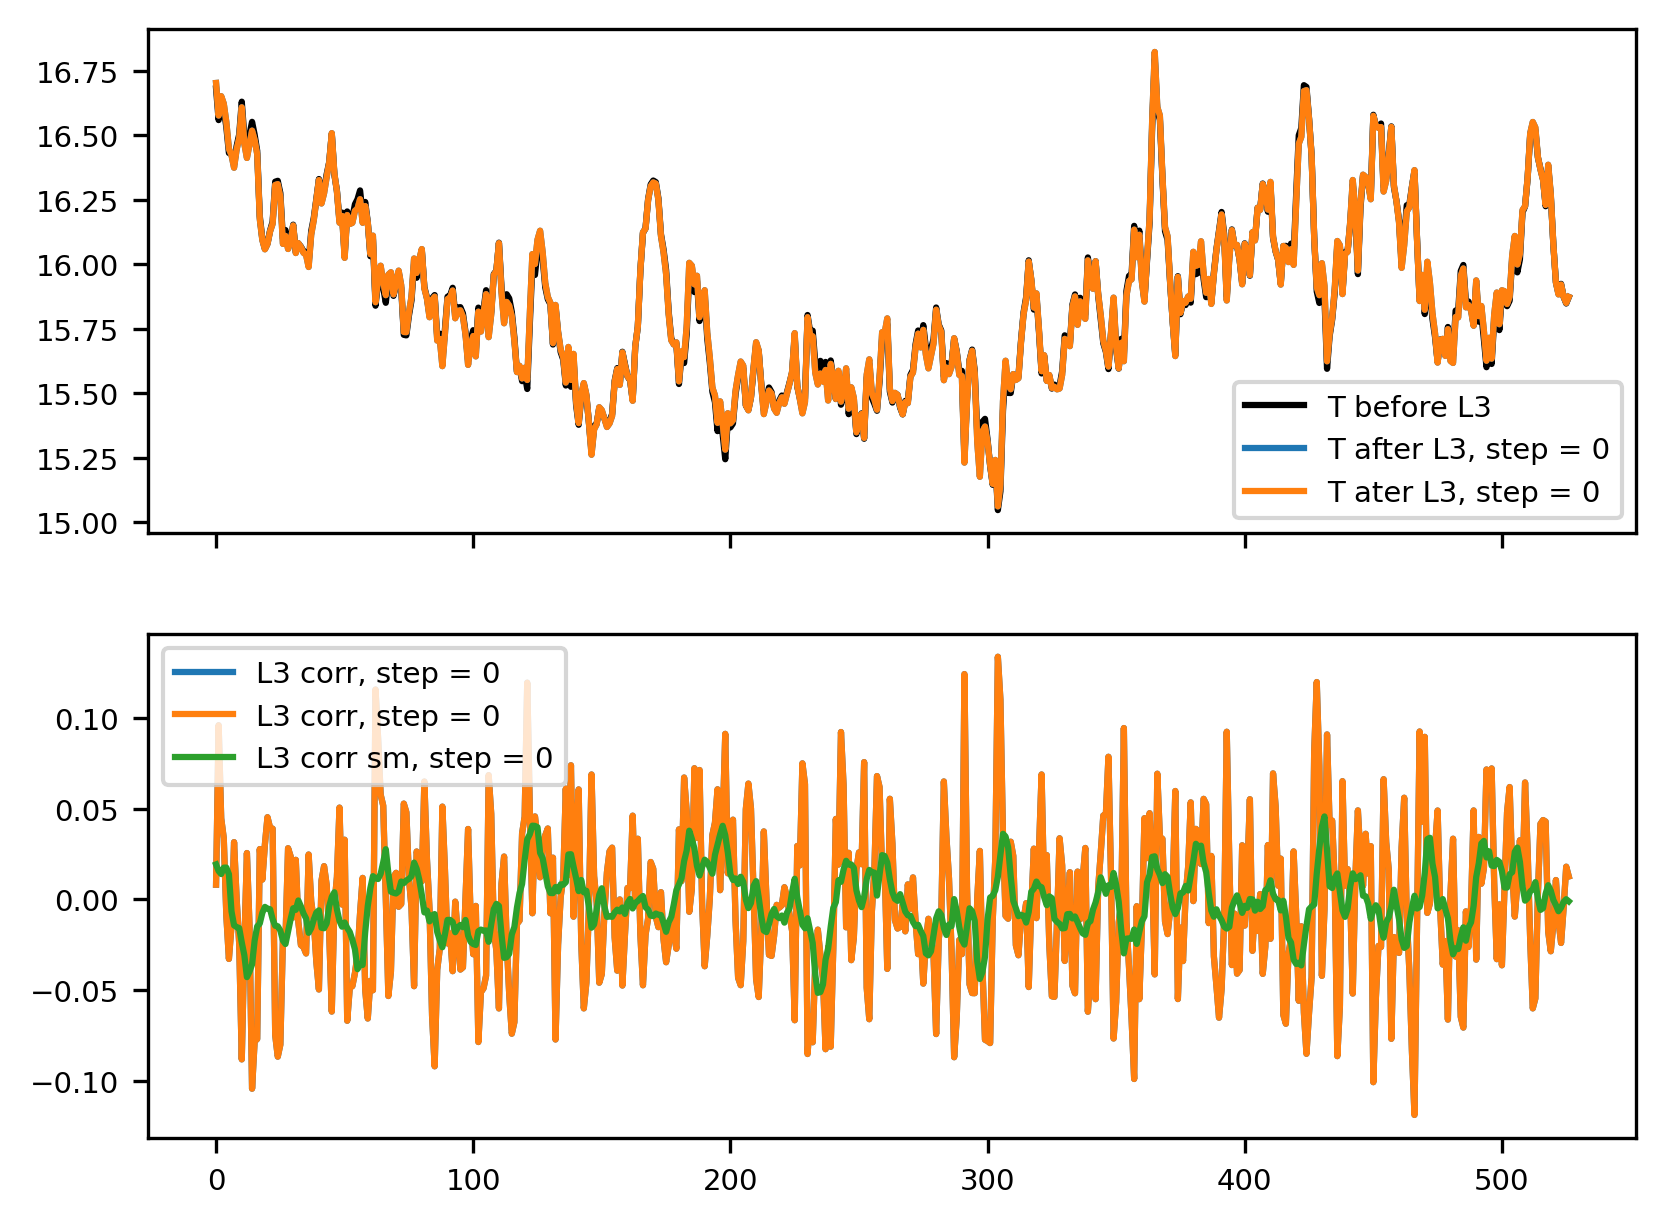

In [ ]:
img_array['t431'], diff_matrix['t431'] = IR_corrections.run_L4_corr (img_array['t31'], img_df, diff_matrix['t31'], 
                                                                     pics_dir = save_dir, opts_str = opts_str)

img_array['t3431'], diff_matrix['t3431'] = IR_corrections.run_L3_corr (img_array['t431'], img_df, diff_matrix['t431'], diff_weights, 1,
                                                                       corr_opts['L3_wnd'], pics_dir = save_dir, fig_name = 'L3431_corr', opts_str = opts_str)



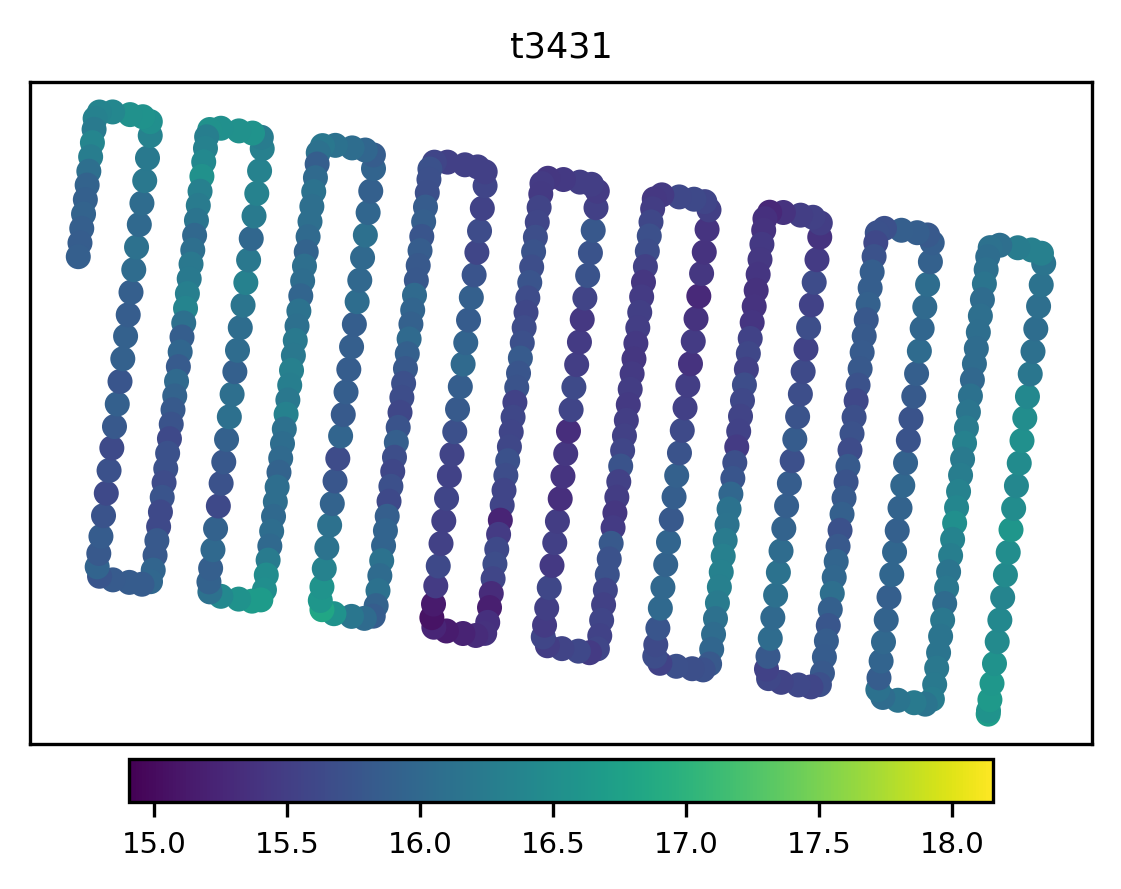

In [ ]:
extent_x = (img_df['gps_lon'].max() - img_df['gps_lon'].min()) * np.cos(img_df['gps_lat'].mean()*np.pi/180)
extent_y = (img_df['gps_lat'].max() - img_df['gps_lat'].min())

x2y_ratio = extent_x / extent_y
#x2y_ratio

mean_t0 = np.mean(np.mean(img_array['t_raw'], axis=0), axis=0)
plt.figure (figsize=(3*x2y_ratio*0.8, 3) if x2y_ratio > 1 else (3, 3 / (x2y_ratio*0.8)))
    
for key in img_array.keys():
    plt.clf()
    mean_t = np.mean(np.mean(img_array[key], axis=0), axis=0)
    im = plt.scatter(img_df['gps_lon'], img_df['gps_lat'], 25, mean_t, vmin = mean_t0.min(), vmax = mean_t0.max())
    #cx.add_basemap(plt.gca(), source = cx.providers.Esri.WorldImagery, crs = 4326, attribution_size = 2)    
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.gca().set_aspect(1.0/np.cos(img_df['gps_lat'].mean()*np.pi/180))
    plt.title (key)

    if x2y_ratio > 1:
        plt.subplots_adjust(left=0.01, bottom=0.1, right=0.99, top=0.9, wspace=0.01, hspace=0.1)
        plt.colorbar(orientation = 'horizontal', pad=0.02, fraction=0.06)
    else:
        plt.subplots_adjust(left=0.01, bottom=0.01, right=0.9, top=0.9, wspace=0.01, hspace=0.1)
        plt.colorbar(orientation = 'vertical', pad=0.02, fraction=0.06)
    

    plt.savefig(save_dir + 'map_' + key + ', ' + opts_str + '.png')



In [ ]:

for key in img_array.keys():

    if key not in ['t31', 't32', 't3431']:
        continue

    if data_subdir is None:
        out_dir = data_dir + '\\' + key + ', ' + opts_str
    else:
        out_dir = data_dir + '\\' + key + ', ' + opts_str + ' (' + data_subdir + ')'

    if not os.path.isdir(out_dir):
        os.mkdir(out_dir)

    IR_processing_utils.write_IR_images (img_array[key], img_df, out_dir, n_jobs = 8, update_files = False)

sys.exit()

100%|██████████| 530/530 [02:51<00:00,  3.09it/s]


SystemExit: 

c:\Anaconda\envs\GIS\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
save_dir = pics_dir + '/corr/'
if not os.path.isdir (save_dir):
    os.mkdir (save_dir)

mean_t0 = np.mean(np.mean(img_array['t1'], axis=0), axis=0)

for step in range (0, 50):

    src_key = 't1' if step == 0 else 't4'

    L4_corr = np.zeros_like(img_df['gps_lon'])

    for i in tqdm (range (0, img_df.shape[0])):

        diff_line = diff_matrix[src_key][i, :]
        weight_line = diff_weights[i, :]

        ind2sel = np.where(~np.isnan(diff_line))[0]

        #L3_corr[i] = -np.mean(diff_line[ind2sel_az])/2
        L4_corr[i] = -0.25 * np.sum(diff_line[ind2sel] * weight_line[ind2sel]) / np.sum(weight_line[ind2sel])

    img_array['t4'] = IR_processing_utils.apply_corr2array(img_array[src_key], L4_corr)
    diff_matrix['t4'] =  IR_processing_utils.apply_corr2diff_matrix(diff_matrix[src_key], L4_corr)

    if np.mod (step, 10) == 0:
        tend2prev = np.array([diff_matrix['t4'][i, i-1] if i > 0 else 0 for i in range (0, img_N)])
        mean_t4 = np.mean(np.mean(img_array['t4'], axis=0), axis=0)

        
        fig, ax = plt.subplots(2,2, figsize = (10, 5))

        ax = ax.flatten()
        ax[0].scatter(img_df['gps_lon'], img_df['gps_lat'], 25, mean_t4)


        cx.add_basemap(ax[0], source = cx.providers.Esri.WorldImagery, crs = 4326, attribution_size = 2)    
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        ax[0].set_aspect(1.0/np.cos(img_df['gps_lat'].mean()*np.pi/180))
        
        ax[1].plot(mean_t0)
        ax[1].plot(mean_t4)

        ax[3].plot (tend2prev)
        
        plt.savefig(save_dir + 'L4_corr, detrend=' + str (corr_opts['detrend']) + '_step' + str(step) + '.png')
    #break



